# Global Power Plant Database

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

Let's load the dataset.

In [2]:
GPPD = pd.read_csv("C:/Users/vaddi/Downloads/database_IND.csv")
GPPD

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

The dataset contains 907 rows and 27 columns.
Now, lets check for the null values in the dataset

In [3]:
GPPD.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

19 columns out of 27 contains null values.

In [4]:
GPPD.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

It is observed that the dataset is mixture of float and object datatypes

Now, let's see the statistical information of the dataset

In [5]:
GPPD.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

Let's drop the empty and unnecessary columns from the dataset

In [6]:
list1 = ['country','country_long','name', 'gppd_idnr','other_fuel1','other_fuel2','other_fuel3','owner','source','url','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source']
GPPD.drop(list1, axis=1, inplace=True)

Let's cagetorise the columns based on their data types

In [7]:
categorical_cols = []
numerical_cols = []
for i in GPPD.columns:
    if GPPD[i].dtypes == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print("Categorical_cols : ", categorical_cols)
print("numerical_cols : ", numerical_cols)

Categorical_cols :  ['primary_fuel', 'geolocation_source']
numerical_cols :  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


Let's fill the empty rows with the mode value for 'geolocation_source' column

In [8]:
mode_value = GPPD['geolocation_source'].mode()[0]
GPPD['geolocation_source'].fillna(mode_value, inplace=True)

Let's fill the empty rows in other columns with the median value of respective column

In [9]:
for column in GPPD.columns:
    if GPPD[column].isnull().sum() > 0:
        median_value = GPPD[column].median()
        GPPD[column].fillna(median_value, inplace=True)

Let's check for the nul values again

In [10]:
GPPD.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# Let's define the 'Fuel Type' of our database based on 'capacity_mw'

# Data Visualization

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


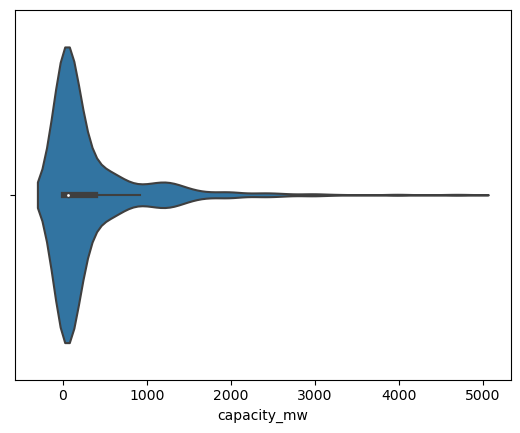

In [11]:
#Let's visualize the data in capacity_mw column
sns.violinplot(x="capacity_mw",data=GPPD)
print(GPPD['capacity_mw'].value_counts())
plt.show()


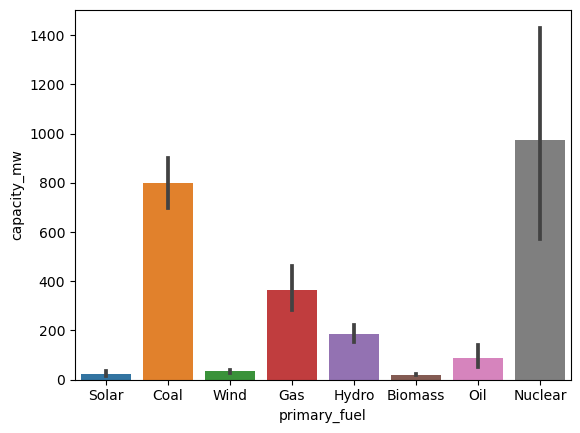

In [12]:
#Let's visualize the relation between 'Primary_fuel' and 'Capacity_mw'
sns.barplot(x="primary_fuel",y="capacity_mw",data=GPPD)
plt.show()

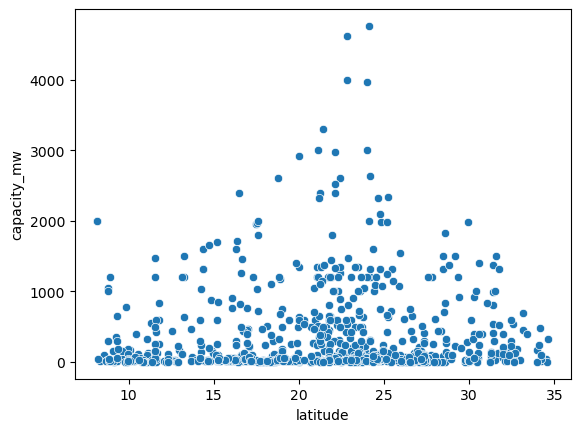

In [13]:
#Let's visualize the relation between 'latitude' and 'Capacity_mw'
sns.scatterplot(x="latitude",y="capacity_mw",data=GPPD)
plt.show()

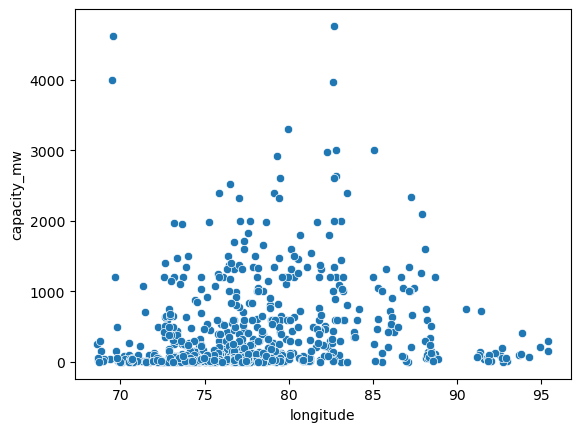

In [14]:
#Let's visualize the relation between 'longitude' and 'Capacity_mw'
sns.scatterplot(x="longitude",y="capacity_mw",data=GPPD)
plt.show()

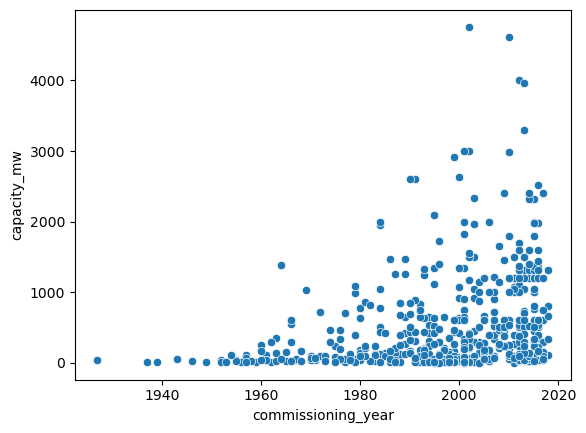

In [15]:
#Let's visualize the relation between 'commissioning_year' and 'Capacity_mw'
sns.scatterplot(x="commissioning_year",y="capacity_mw",data=GPPD)
plt.show()

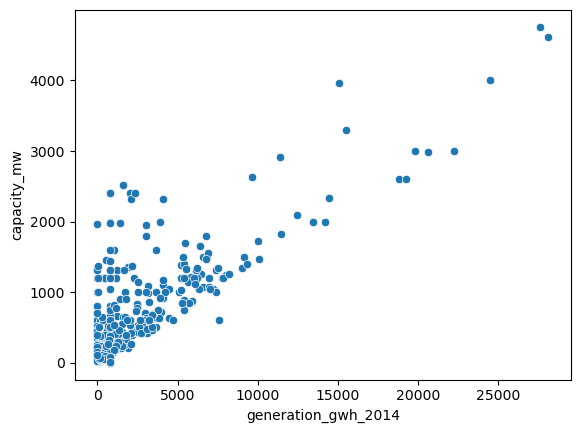

In [16]:
#Let's visualize the relation between 'generation_gwh_2014' and 'Capacity_mw'
sns.scatterplot(x="generation_gwh_2014",y="capacity_mw",data=GPPD)
plt.show()

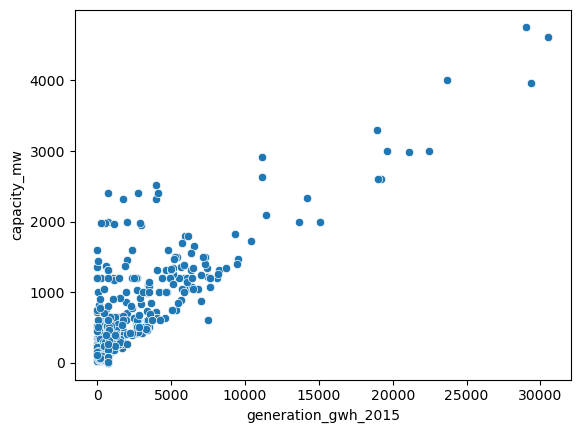

In [17]:
#Let's visualize the relation between 'generation_gwh_2015' and 'Capacity_mw'
sns.scatterplot(x="generation_gwh_2015",y="capacity_mw",data=GPPD)
plt.show()

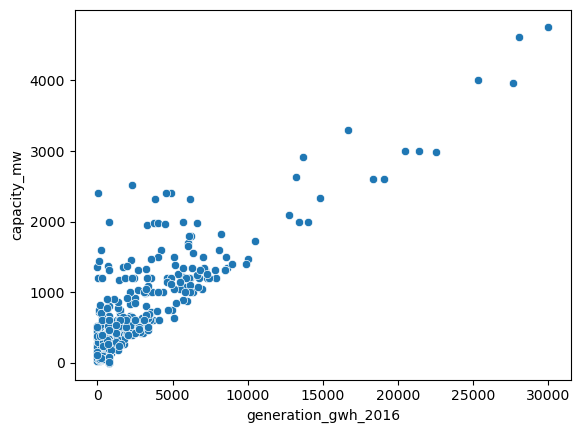

In [18]:
#Let's visualize the relation between 'generation_gwh_2016' and 'Capacity_mw'
sns.scatterplot(x="generation_gwh_2016",y="capacity_mw",data=GPPD)
plt.show()

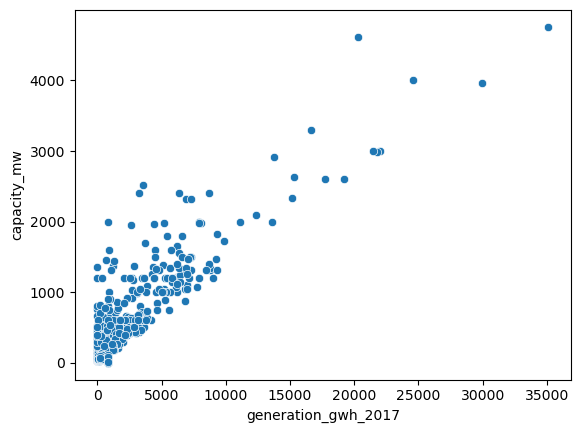

In [19]:
#Let's visualize the relation between 'generation_gwh_2017' and 'Capacity_mw'
sns.scatterplot(x="generation_gwh_2017",y="capacity_mw",data=GPPD)
plt.show()

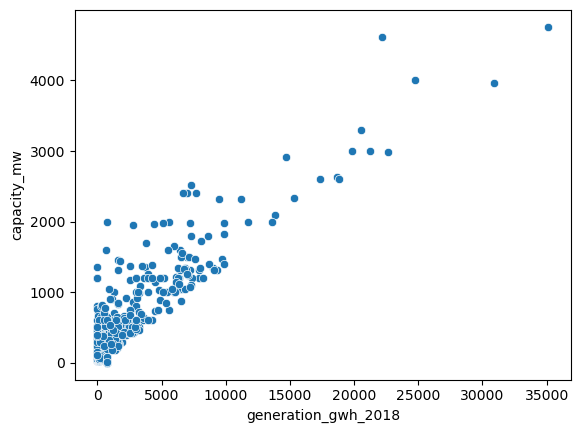

In [20]:
#Let's visualize the relation between 'generation_gwh_2018' and 'Capacity_mw'
sns.scatterplot(x="generation_gwh_2018",y="capacity_mw",data=GPPD)
plt.show()

Multivariant Analysis

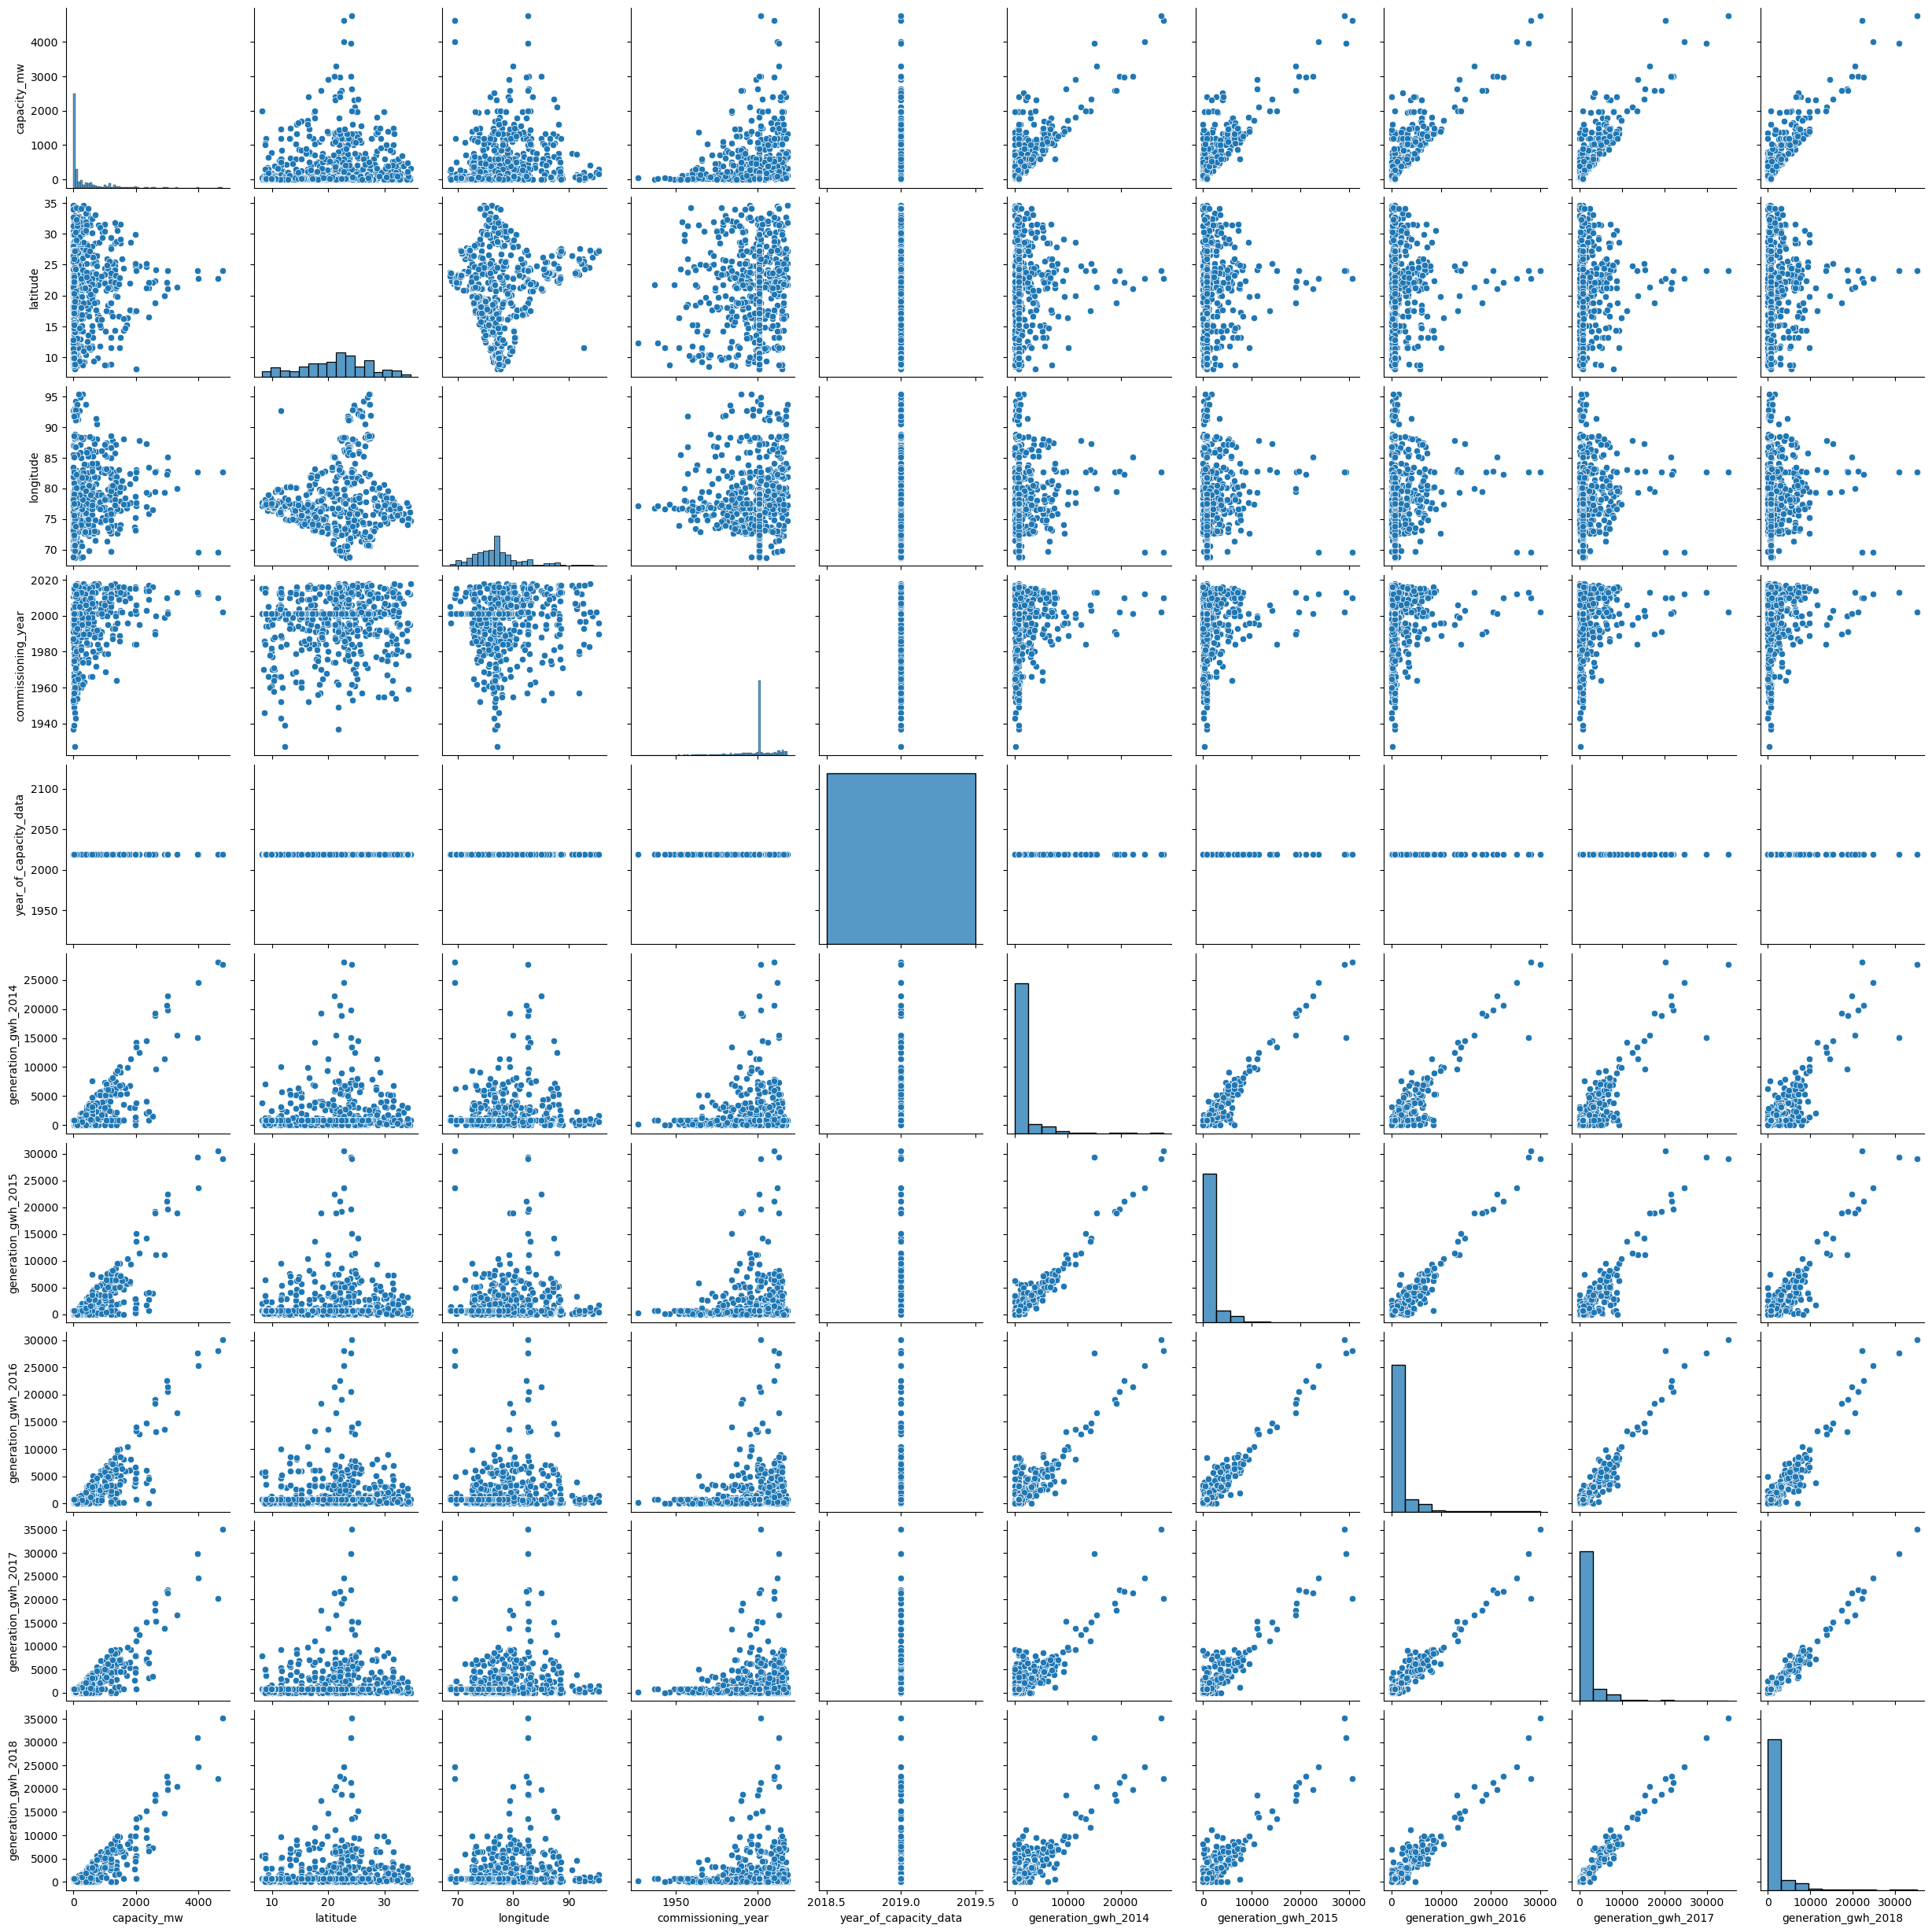

In [21]:

sns.pairplot(GPPD)
plt.show()

In [22]:
#Dropping the 'year of capacity data' column as it contains single value
GPPD.drop('year_of_capacity_data', axis=1, inplace=True)

In [23]:
#Let's again check the statistical info of the dataset
GPPD.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.227439   77.427103         1998.728776   
std     590.085456    6.080491    4.815073           13.158621   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           1657.121797          1665.011030  
std            3046.862910          3168.826750  
min               0.000000             0.000000  
25%             817.977250           751.644375  
50%             817.977250           751.644375  
75%             817.977250           751.644375  
max           35116.000000         35136.000000

In [24]:
corr=GPPD.corr()
corr

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw             1.000000  0.048790   0.199299            0.211042   
latitude                0.048790  1.000000   0.035619            0.088098   
longitude               0.199299  0.035619   1.000000            0.029583   
commissioning_year      0.211042  0.088098   0.029583            1.000000   
generation_gwh_2014     0.793497  0.057179   0.106855            0.076971   
generation_gwh_2015     0.819676  0.052422   0.123763            0.108752   
generation_gwh_2016     0.853008  0.046267   0.145640            0.140964   
generation_gwh_2017     0.868338  0.056407   0.154014            0.153554   
generation_gwh_2018     0.884840  0.053700   0.157405            0.156927   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.793497             0.819676   
latitude                        0.057179             0.052422   
longitude                       0.106855             0.123763   
commissioning_year              0.076971             0.108752   
generation_gwh_2014             1.000000             0.963719   
generation_gwh_2015             0.963719             1.000000   
generation_gwh_2016             0.935067             0.973231   
generation_gwh_2017             0.904075             0.940229   
generation_gwh_2018             0.895143             0.933161   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.853008             0.868338   
latitude                        0.046267             0.056407   
longitude                       0.145640             0.154014   
commissioning_year              0.140964             0.153554   
generation_gwh_2014             0.935067             0.904075   
generation_gwh_2015             0.973231             0.940229   
generation_gwh_2016             1.000000             0.973909   
generation_gwh_2017             0.973909             1.000000   
generation_gwh_2018             0.964988             0.986685   

                     generation_gwh_2018  
capacity_mw                     0.884840  
latitude                        0.053700  
longitude                       0.157405  
commissioning_year              0.156927  
generation_gwh_2014             0.895143  
generation_gwh_2015             0.933161  
generation_gwh_2016             0.964988  
generation_gwh_2017             0.986685  
generation_gwh_2018             1.000000

<AxesSubplot:>

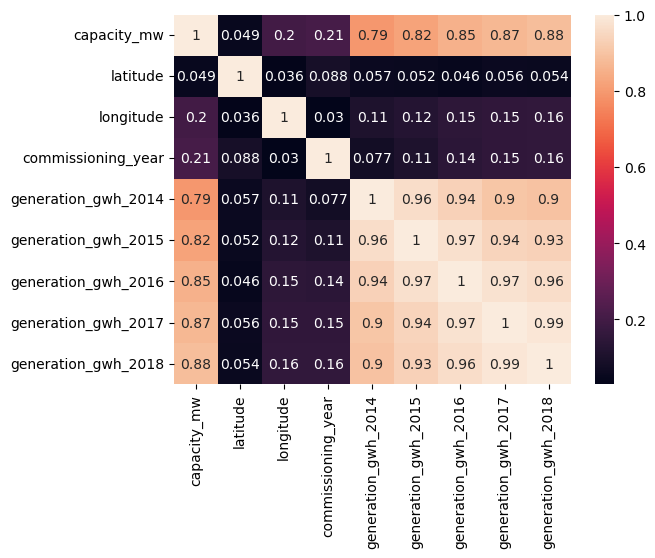

In [25]:
sns.heatmap(corr, annot=True)

In [26]:
#Let's convert the categorical data to numerical data
label_encoder = LabelEncoder()
GPPD['primary_fuel'] = label_encoder.fit_transform(GPPD['primary_fuel'])
GPPD['geolocation_source'] = label_encoder.fit_transform(GPPD['geolocation_source'])

Now, the data is ready to apply the model

In [27]:
#X =gppd_df.iloc[:,1:]

X =GPPD.iloc[:,1:]

In [28]:
#Y= gppd_df.iloc[:,0]
Y= GPPD.iloc[:,0]


In [29]:
#Let's create a funtion for the model to check the results at different random states and preint the r2 score value
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(X_train,Y_train)
        Y_pred = regr.predict(X_test)
        r2_scr=r2_score(Y_test,Y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [30]:
#Let's create a funtion for the model evluation using cross validation and printing the score values
def model_evaluation(model,X,Y):
    c_scores=cross_val_score(model,X,Y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [34]:
#lets make use of KNN regressor
#we will use pipeline to bring bring features to common scale

knr=KNeighborsRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("knr",KNeighborsRegressor())])
parameters = {"knr__n_neighbors":range(2,30)}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(X,Y)
clf.best_params_

{'knr__n_neighbors': 4}

In [35]:
#knr=KNeighborsRegressor(n_neighbors=4)
pipeline_knr=Pipeline([("ss",StandardScaler()),("knr",KNeighborsRegressor(n_neighbors=4))])
maxr2_score(pipeline_knr,X,Y)

r2 score corresponding to  42  is  0.8230597868261078
r2 score corresponding to  43  is  0.7840198644521662
r2 score corresponding to  44  is  0.886435672563317
r2 score corresponding to  45  is  0.8157380742481883
r2 score corresponding to  46  is  0.7582355690693432
r2 score corresponding to  47  is  0.8325409003533807
r2 score corresponding to  48  is  0.7892664985288877
r2 score corresponding to  49  is  0.812718596686623
r2 score corresponding to  50  is  0.867930422819628
r2 score corresponding to  51  is  0.8364635822179165
r2 score corresponding to  52  is  0.859403900684967
r2 score corresponding to  53  is  0.8590920992137929
r2 score corresponding to  54  is  0.7708482549972976
r2 score corresponding to  55  is  0.8488316177913923
r2 score corresponding to  56  is  0.8140579922600968
r2 score corresponding to  57  is  0.7836678792587068
r2 score corresponding to  58  is  0.8028303452950325
r2 score corresponding to  59  is  0.820509491123089
r2 score corresponding to  60  is

87

Let's try Random Forest Regressor

In [36]:
#Lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor())])
parameters = {"rfr__n_estimators":[10,100,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(X,Y)
clf.best_params_

{'rfr__n_estimators': 500}

In [37]:
pipeline_rfr=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor(n_estimators=500))])
maxr2_score(pipeline_rfr,X,Y)

r2 score corresponding to  42  is  0.8809833891931453
r2 score corresponding to  43  is  0.8203866650746227
r2 score corresponding to  44  is  0.9070386331124105
r2 score corresponding to  45  is  0.8100520195542296
r2 score corresponding to  46  is  0.7902009166713273
r2 score corresponding to  47  is  0.8608844400237432
r2 score corresponding to  48  is  0.7757440120567802
r2 score corresponding to  49  is  0.8795763188256308
r2 score corresponding to  50  is  0.8950401913366336
r2 score corresponding to  51  is  0.8888028601199337
r2 score corresponding to  52  is  0.8839661695834923
r2 score corresponding to  53  is  0.9027161501029922
r2 score corresponding to  54  is  0.8595722921346404
r2 score corresponding to  55  is  0.8664510026152227
r2 score corresponding to  56  is  0.8633818346124926
r2 score corresponding to  57  is  0.8219579795259803
r2 score corresponding to  58  is  0.8218797542853565
r2 score corresponding to  59  is  0.8717528075644487
r2 score corresponding to  6

87

In [38]:
#lets chcek the cross_val_score for random forest
print("RANDOM FOREST\n\n")
model_evaluation(pipeline_rfr,X,Y)

RANDOM FOREST


Mean r2 score for regressor:  0.8535199555908346
standard deviation in r2 score for regressor:  0.020024950040861113
[0.85701408 0.82847657 0.83697328 0.85903703 0.88609882]


In [39]:
#lets make the final model and save it
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 87,test_size=0.20)
pipeline_rfr.fit(X_train,Y_train)
Y_pred = pipeline_rfr.predict(X_test)

In [40]:
#Lets find the rmse and r2_score using sklearn.metrics for random forest model
print("MSE is: ",mean_squared_error(Y_test,Y_pred))
print("r2_score is: ",r2_score(Y_test,Y_pred))

MSE is:  24362.681281579506
r2_score is:  0.9292751086339464


# Saving the model

In [41]:
import joblib

#saving the best model
joblib.dump(pipeline_rfr, 'capacity.pkl')

['capacity.pkl']

# Let's work on 'Primary Fuel' ass target value

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

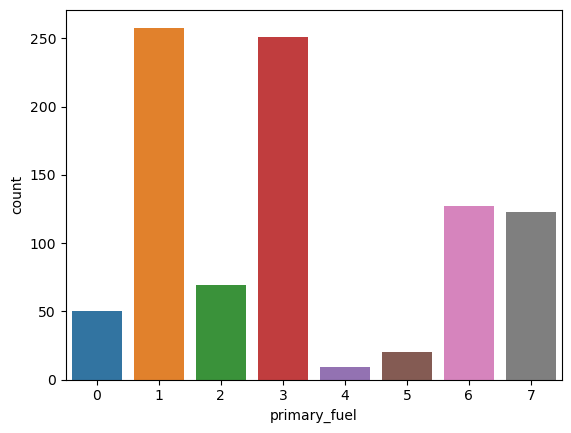

In [43]:
#Let's visualize the data in primary_fuel column
sns.countplot(x="primary_fuel",data=GPPD)
plt.show()

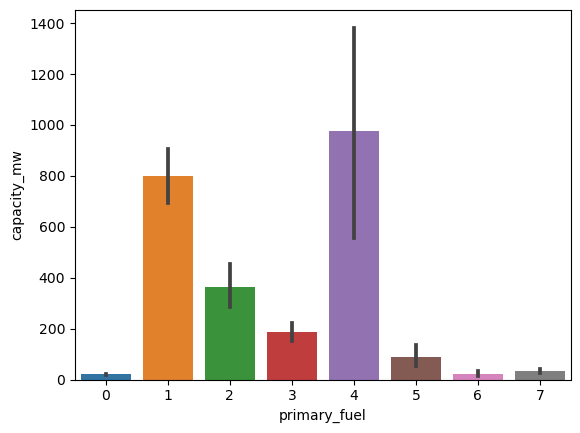

In [44]:
#Let's visualize the relation between 'Primary_fuel' and 'Capacity_mw'
sns.barplot(x="primary_fuel",y="capacity_mw",data=GPPD)
plt.show()

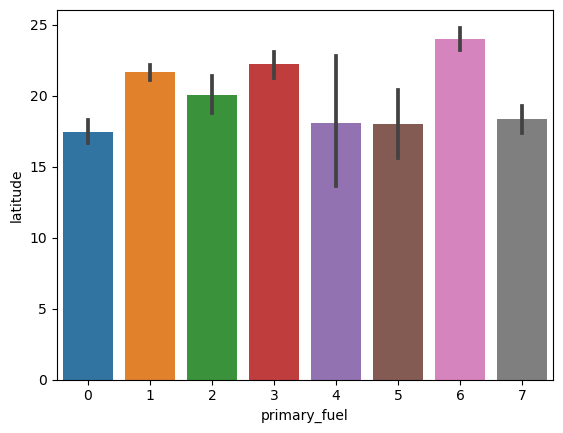

In [45]:
#Let's visualize the relation between 'Primary_fuel' and 'latitude'

sns.barplot(x="primary_fuel",y="latitude",data=GPPD)
plt.show()

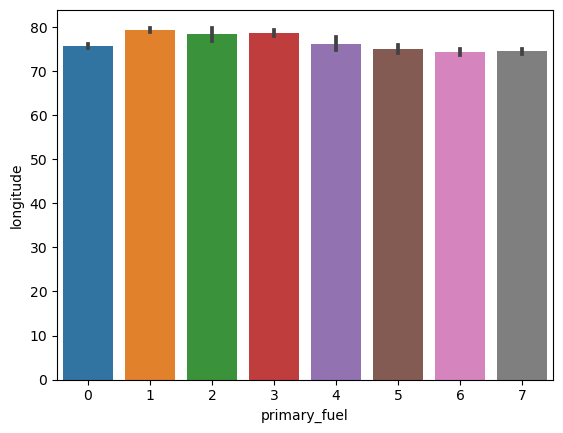

In [46]:
#Let's visualize the relation between 'Primary_fuel' and 'longitude'

sns.barplot(x="primary_fuel",y="longitude",data=GPPD)
plt.show()

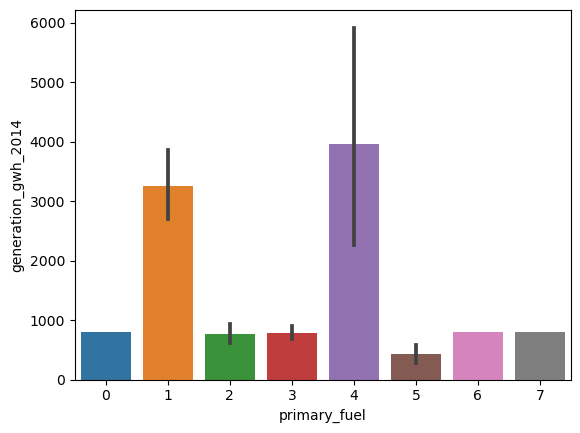

In [47]:
#Let's visualize the relation between 'Primary_fuel' and 'generation_gwh_2014'

sns.barplot(x="primary_fuel",y="generation_gwh_2014",data=GPPD)
plt.show()

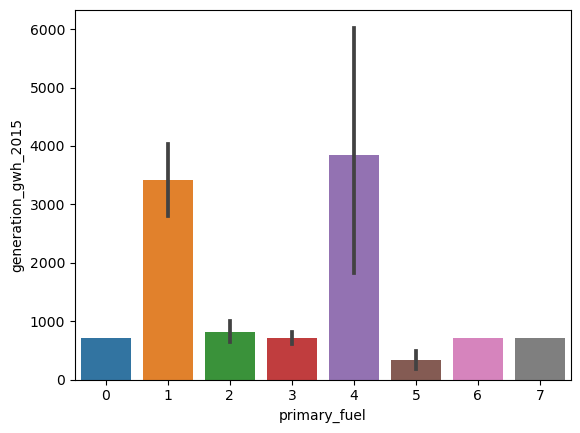

In [48]:
#Let's visualize the relation between 'Primary_fuel' and 'generation_gwh_2015'

sns.barplot(x="primary_fuel",y="generation_gwh_2015",data=GPPD)
plt.show()

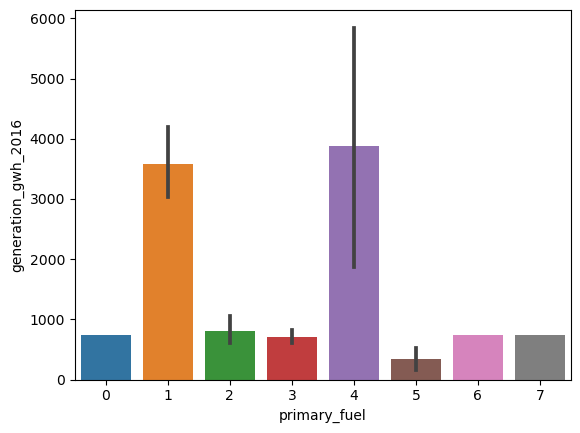

In [49]:
#Let's visualize the relation between 'Primary_fuel' and 'generation_gwh_2016'

sns.barplot(x="primary_fuel",y="generation_gwh_2016",data=GPPD)
plt.show()

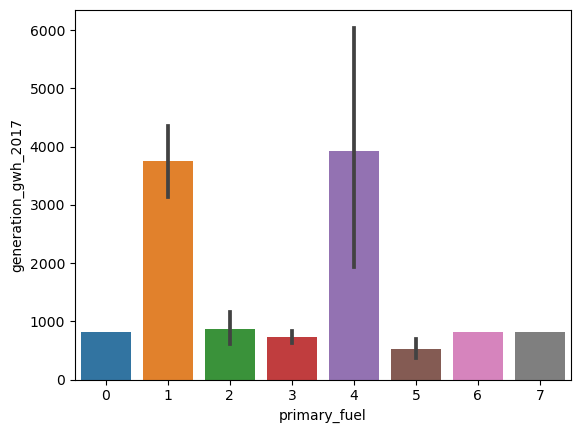

In [50]:
#Let's visualize the relation between 'Primary_fuel' and 'generation_gwh_2017'

sns.barplot(x="primary_fuel",y="generation_gwh_2017",data=GPPD)
plt.show()

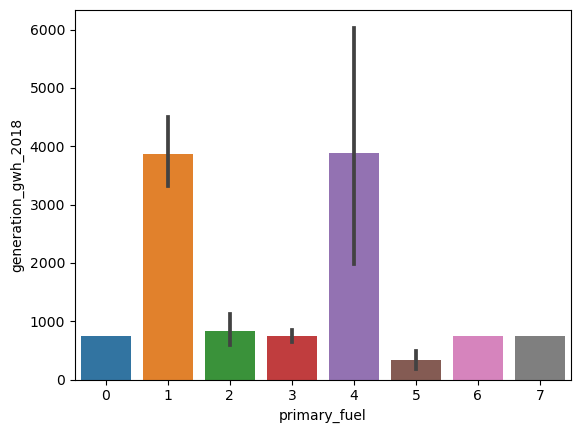

In [51]:
#Let's visualize the relation between 'Primary_fuel' and 'generation_gwh_2018'

sns.barplot(x="primary_fuel",y="generation_gwh_2018",data=GPPD)
plt.show()

 Multivariant Analysis  


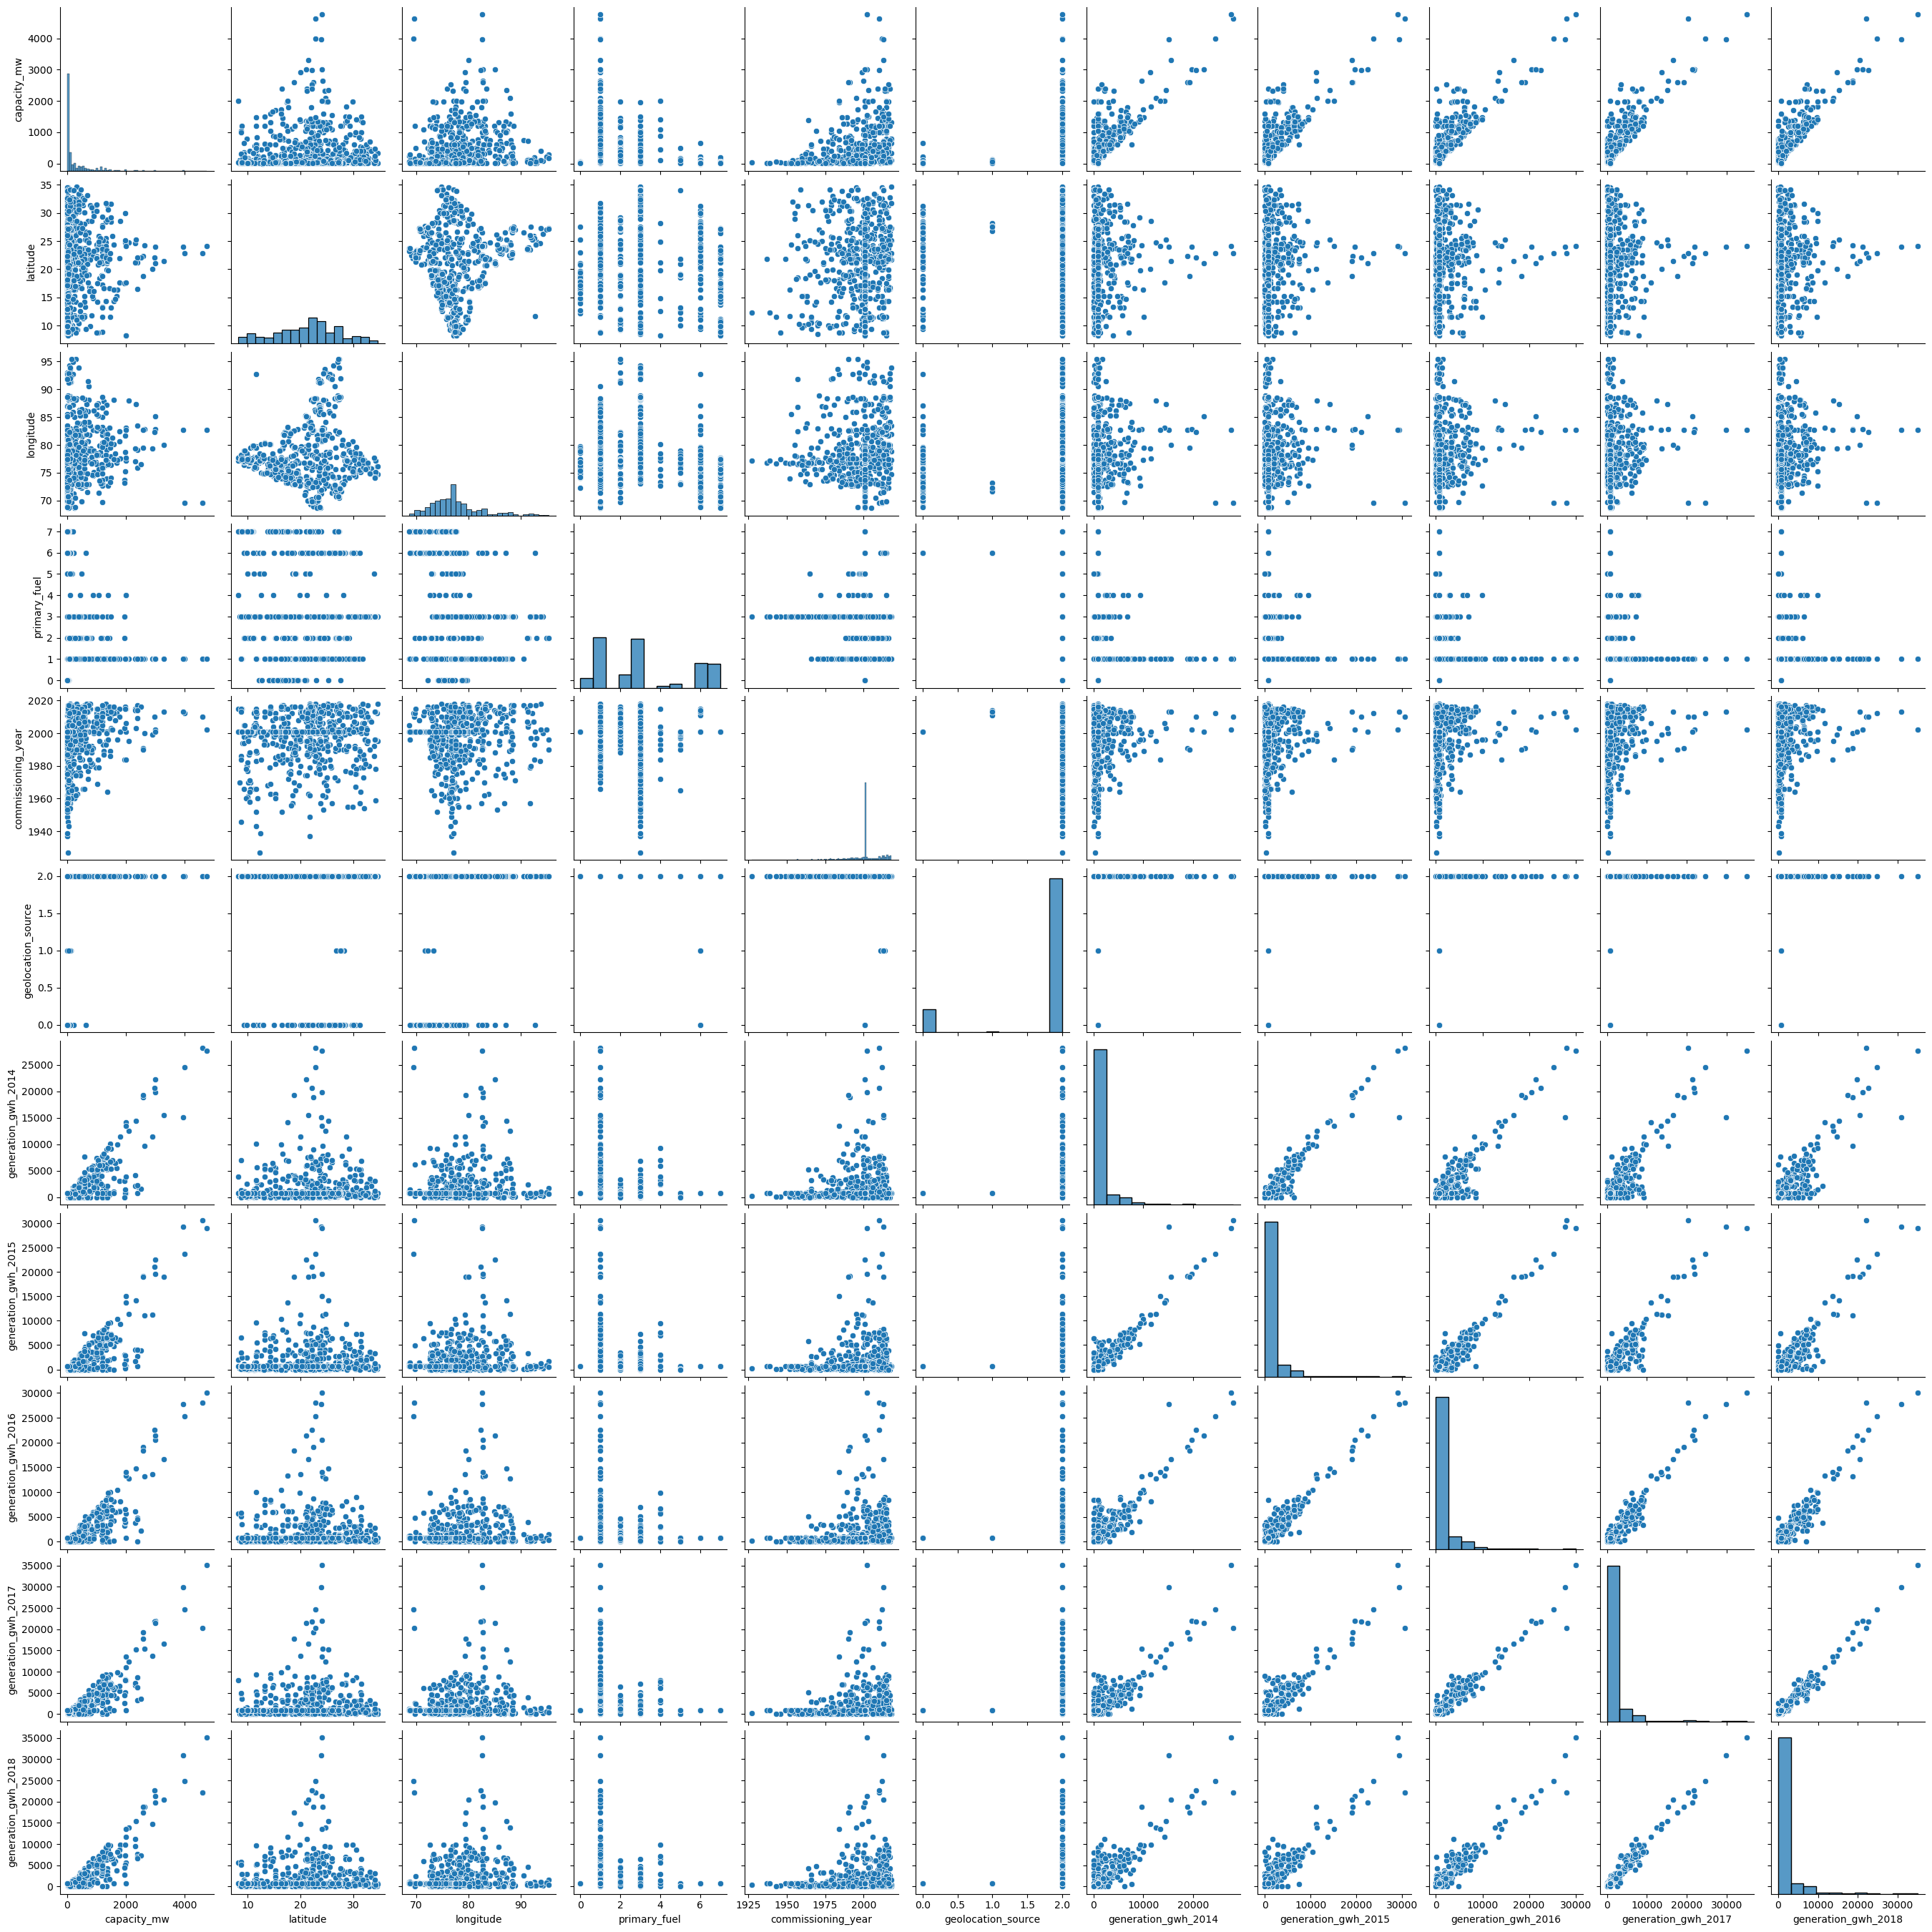

In [52]:
sns.pairplot(GPPD)
plt.show()

In [54]:
#Let's move the independent variabled to df_x to check for the outliers
df_x= GPPD.iloc[:, :3].join(GPPD.iloc[:, 5:])

In [55]:
z_sc =  np.abs(zscore(df_x))
z_sc

capacity_mw  latitude  longitude  geolocation_source  \
0       0.548908  1.144693   0.869917            1.083349   
1       0.386977  0.582324   0.585590            0.394241   
2       0.486679  0.111296   1.673567            0.394241   
3       0.324240  0.435034   2.895239            0.394241   
4       2.498942  0.120593   1.035238            0.394241   
..           ...       ...        ...                 ...   
902     2.159821  0.811655   0.014609            0.394241   
903     0.548060  1.371409   0.153415            2.560940   
904     0.509909  0.979349   0.383592            0.394241   
905     0.417498  0.513821   0.764564            0.394241   
906     0.525169  1.858282   0.010327            0.394241   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               0.257022             0.267783             0.275737   
1               0.257022             0.267783             0.275737   
2               0.257022             0.267783             0.275737   
3               0.322873             0.223348             0.226194   
4               0.545554             1.476964             1.557432   
..                   ...                  ...                  ...   
902             0.257022             0.505833             0.443415   
903             0.257022             0.267783             0.275737   
904             0.257022             0.267783             0.275737   
905             0.257022             0.267783             0.275737   
906             0.257022             0.267783             0.275737   

     generation_gwh_2017  generation_gwh_2018  
0               0.275565             0.288394  
1               0.275565             0.288394  
2               0.275565             0.288394  
3               0.326203             0.327990  
4               1.224379             1.772608  
..                   ...                  ...  
902             0.259992             0.308963  
903             0.275565             0.288394  
904             0.275565             0.288394  
905             0.275565             0.288394  
906             0.275565             0.288394  

[907 rows x 9 columns]

In [56]:
#Let's see the values that are beyond the threshold value
threshold = 3
print(np.where(z_sc>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [57]:
#Let's create a new dataset by removing all the outliers
df_new = GPPD[(z_sc<3).all(axis=1)]

In [58]:
#Let's check for the skewness
df_new.skew()

capacity_mw            2.029125
latitude              -0.125873
longitude              0.963197
primary_fuel           0.417203
commissioning_year    -1.741758
geolocation_source    -2.095811
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [59]:
#Let's reduce the skewness of the data
for index in df_new.skew().index:
    if index != 'primary_fuel':
        if df_new.skew().loc[index] > 0.5:
            df_new[index] = np.log1p(df_new[index])
        if df_new.skew().loc[index] < -0.5:
            df_new[index] = np.square(df_new[index])

In [60]:
#Let's check the skewness again
df_new.skew()

capacity_mw            0.107438
latitude              -0.125873
longitude              0.781163
primary_fuel           0.417203
commissioning_year    -1.712095
geolocation_source    -2.076632
generation_gwh_2014   -0.559514
generation_gwh_2015   -0.341760
generation_gwh_2016   -0.341322
generation_gwh_2017   -0.479059
generation_gwh_2018   -0.376286
dtype: float64

Now, the data is ready to apply the model

In [61]:
x = df_new.iloc[:, :3].join(df_new.iloc[:, 5:])

In [62]:
x

capacity_mw  latitude  longitude  geolocation_source  \
0       1.252763   28.1839   4.307313                   1   
1       4.595120   24.7663   4.325575                   4   
2       3.693867   21.9038   4.253813                   4   
3       4.912655   23.8712   4.525696                   4   
4       7.496097   21.9603   4.423757                   4   
..           ...       ...        ...                 ...   
902     7.378384   16.2949   4.361273                   4   
903     1.386294   12.8932   4.371539                   0   
904     3.277145   15.2758   4.338350                   4   
905     4.394449   24.3500   4.314118                   4   
906     2.862201    9.9344   4.362803                   4   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              44.719485            43.142991            43.615751   
1              44.719485            43.142991            43.615751   
2              44.719485            43.142991            43.615751   
3              41.316160            45.414622            46.074907   
4              64.295978            75.440470            76.376698   
..                   ...                  ...                  ...   
902            44.719485             0.476903            29.788319   
903            44.719485            43.142991            43.615751   
904            44.719485            43.142991            43.615751   
905            44.719485            43.142991            43.615751   
906            44.719485            43.142991            43.615751   

     generation_gwh_2017  generation_gwh_2018  
0              44.998019            43.871982  
1              44.998019            43.871982  
2              44.998019            43.871982  
3              42.242823            41.490705  
4              73.816723            79.083424  
..                   ...                  ...  
902            45.756386            42.680897  
903            44.998019            43.871982  
904            44.998019            43.871982  
905            44.998019            43.871982  
906            44.998019            43.871982  

[866 rows x 9 columns]

In [63]:
y= df_new.loc[:,'primary_fuel']

Applying K Neighbors Classifier model

In [64]:
#Checking the KNeighbors Classifier model at different random states and their accuracy score
idle_scc = 0.70  # Set a reasonable threshold for accuracy
best_random_state = None
best_accuracy = 0.0
for r_state in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=0.30)
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(x_train, y_train)
    knnpred = knn_classifier.predict(x_test)
    acc = accuracy_score(y_test, knnpred)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_random_state = r_state

    print("Random State:", r_state, "Accuracy:", acc)

if best_accuracy > idle_scc:
    print("The best accuracy rate is", best_accuracy, "for random state:", best_random_state)
else:
    print("No random state achieved an accuracy greater than the threshold.")

    

Random State: 1 Accuracy: 0.6730769230769231
Random State: 2 Accuracy: 0.7
Random State: 3 Accuracy: 0.6653846153846154
Random State: 4 Accuracy: 0.6961538461538461
Random State: 5 Accuracy: 0.6961538461538461
Random State: 6 Accuracy: 0.7
Random State: 7 Accuracy: 0.6576923076923077
Random State: 8 Accuracy: 0.6692307692307692
Random State: 9 Accuracy: 0.6653846153846154
Random State: 10 Accuracy: 0.6192307692307693
Random State: 11 Accuracy: 0.7115384615384616
Random State: 12 Accuracy: 0.6807692307692308
Random State: 13 Accuracy: 0.6846153846153846
Random State: 14 Accuracy: 0.6692307692307692
Random State: 15 Accuracy: 0.6884615384615385
Random State: 16 Accuracy: 0.6307692307692307
Random State: 17 Accuracy: 0.6384615384615384
Random State: 18 Accuracy: 0.6961538461538461
Random State: 19 Accuracy: 0.7153846153846154
Random State: 20 Accuracy: 0.6692307692307692
Random State: 21 Accuracy: 0.6615384615384615
Random State: 22 Accuracy: 0.65
Random State: 23 Accuracy: 0.646153846153

The maximum score obtained in KNN clasifier is 0.7423076923076923  at random state 82

Let's try the Support Vector Classifier

In [65]:
idle_scc = 0.80  # Set a reasonable threshold for accuracy

best_random_state = None
best_accuracy = 0.0

for r_state in range(42, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=0.30)
    svc = SVC()
    svc.fit(x_train, y_train)
    svcpred = svc.predict(x_test)
    acc = accuracy_score(y_test, svcpred)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_random_state = r_state

    print("Random State:", r_state, "Accuracy:", acc)

if best_accuracy > idle_scc:
    print("The best accuracy rate is", best_accuracy, "for random state:", best_random_state)
else:
    print("No random state achieved an accuracy greater than the threshold.")


Random State: 42 Accuracy: 0.5346153846153846
Random State: 43 Accuracy: 0.5576923076923077
Random State: 44 Accuracy: 0.5076923076923077
Random State: 45 Accuracy: 0.5884615384615385
Random State: 46 Accuracy: 0.48846153846153845
Random State: 47 Accuracy: 0.5269230769230769
Random State: 48 Accuracy: 0.5346153846153846
Random State: 49 Accuracy: 0.5307692307692308
Random State: 50 Accuracy: 0.5538461538461539
Random State: 51 Accuracy: 0.5307692307692308
Random State: 52 Accuracy: 0.5692307692307692
Random State: 53 Accuracy: 0.5038461538461538
Random State: 54 Accuracy: 0.5038461538461538
Random State: 55 Accuracy: 0.5538461538461539
Random State: 56 Accuracy: 0.47692307692307695
Random State: 57 Accuracy: 0.6115384615384616
Random State: 58 Accuracy: 0.5269230769230769
Random State: 59 Accuracy: 0.5346153846153846
Random State: 60 Accuracy: 0.5192307692307693
Random State: 61 Accuracy: 0.49230769230769234
Random State: 62 Accuracy: 0.5230769230769231
Random State: 63 Accuracy: 0.48

The maximum accuracy rate obtained in SVC model is 0.6115384615384616 at random state 57

Let's check with Random forest Classifier

In [66]:
idle_scc = 0.80  # Set a reasonable threshold for accuracy

best_random_state = None
best_accuracy = 0.0

for r_state in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=0.30)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    rfcpred = rfc.predict(x_test)
    acc = accuracy_score(y_test, rfcpred)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_random_state = r_state

    print("Random State:", r_state, "Accuracy:", acc)

if best_accuracy > idle_scc:
    print("The best accuracy rate is", best_accuracy, "for random state:", best_random_state)
else:
    print("No random state achieved an accuracy greater than the threshold.")



Random State: 1 Accuracy: 0.7230769230769231
Random State: 2 Accuracy: 0.7346153846153847
Random State: 3 Accuracy: 0.7653846153846153
Random State: 4 Accuracy: 0.7615384615384615
Random State: 5 Accuracy: 0.7846153846153846
Random State: 6 Accuracy: 0.7576923076923077
Random State: 7 Accuracy: 0.7538461538461538
Random State: 8 Accuracy: 0.7769230769230769
Random State: 9 Accuracy: 0.7307692307692307
Random State: 10 Accuracy: 0.7346153846153847
Random State: 11 Accuracy: 0.7730769230769231
Random State: 12 Accuracy: 0.7730769230769231
Random State: 13 Accuracy: 0.7961538461538461
Random State: 14 Accuracy: 0.7615384615384615
Random State: 15 Accuracy: 0.7307692307692307
Random State: 16 Accuracy: 0.7269230769230769
Random State: 17 Accuracy: 0.7769230769230769
Random State: 18 Accuracy: 0.7538461538461538
Random State: 19 Accuracy: 0.75
Random State: 20 Accuracy: 0.7384615384615385
Random State: 21 Accuracy: 0.7423076923076923
Random State: 22 Accuracy: 0.7423076923076923
Random Stat

In [67]:
#Let's create a model with the best random state and save it
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state= 82)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)
acc = accuracy_score(y_test, rfcpred)
acc

0.8192307692307692

In [68]:
print(confusion_matrix(y_test,rfcpred))

[[11  1  0  3  0  0  1]
 [ 2 61  1 10  2  0  1]
 [ 0  4  6 10  2  0  0]
 [ 1  3  0 58  0  0  0]
 [ 0  0  3  0  2  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  0  3  0  0 34]]


<AxesSubplot:>

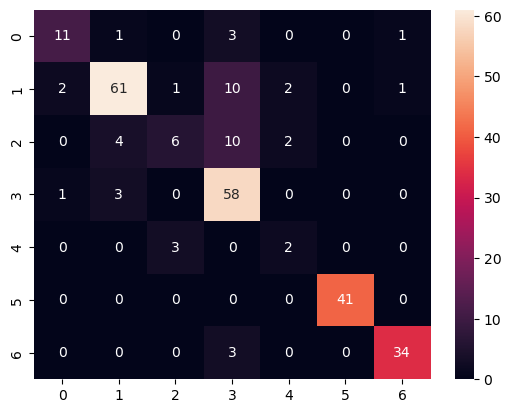

In [69]:
sns.heatmap(confusion_matrix(y_test,rfcpred), annot=True)

In [70]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.88      0.79      0.84        77
           2       0.60      0.27      0.37        22
           3       0.69      0.94      0.79        62
           5       0.33      0.40      0.36         5
           6       1.00      1.00      1.00        41
           7       0.94      0.92      0.93        37

    accuracy                           0.82       260
   macro avg       0.75      0.72      0.72       260
weighted avg       0.82      0.82      0.81       260



# Saving the model

In [71]:
import joblib

joblib.dump(rfc,'Primary_Fuel.pkl')

['Primary_Fuel.pkl']

# **********************************************************************************************

# Temperature Forecast Project using ML

In [88]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV




Let's load the dataset.

In [73]:
tfp = pd.read_csv("C:/Users/vaddi/Downloads/temperature.csv")
tfp

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [74]:
tfp.shape

(7752, 25)

The dataset contains 7752  rows and 25  columns. 


In [75]:
#Let's check for the datatypes of the columns
tfp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [76]:
#Now, lets check for the null values in the dataset
tfp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [77]:
#Let's list the rows that contain nul values
nan_indices = tfp.index[tfp.isna().any(axis=1)]

In [78]:
nan_indices

Int64Index([ 225,  271,  300,  450,  464,  627,  831,  856,  881,  913,
            ...
            7571, 7579, 7596, 7604, 7605, 7629, 7682, 7707, 7750, 7751],
           dtype='int64', length=164)

In [79]:
len(nan_indices)

164

There are 164 rows with the null values, let's drop those rows 

In [80]:
tfp.drop(nan_indices, axis=0, inplace=True)

#Let's check for the null values in the dataset again
tfp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [81]:
#Dropping the Station and Date columns from the dataset
list1 =["station","Date"]
tfp.drop(list1, axis=1, inplace=True)

Now, let's see the statistical information of the dataset


In [82]:
tfp.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7588.000000   7588.000000  7588.000000  7588.000000       7588.000000   
mean      29.748366     23.195809    56.724969    88.360823         29.620128   
std        2.967401      2.400880    14.626559     7.199456          2.943496   
min       20.000000     11.300000    19.794666    58.936283         17.624954   
25%       27.800000     21.600000    45.960243    84.203724         27.673756   
50%       29.900000     23.400000    55.023199    89.784122         29.709537   
75%       32.000000     24.800000    67.115099    93.742725         31.711109   
max       37.600000     29.900000    98.524734   100.000153         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean          23.511786     7.094097    62.492606     0.368510     0.355528   
std            2.342579     2.177034    33.686158     0.262260     0.257922   
min           14.272646     2.882580   -13.603212     0.000000     0.000000   
25%           22.086820     5.675358    37.206201     0.146546     0.140324   
50%           23.758249     6.547838    56.898324     0.315706     0.311676   
75%           25.155660     8.028960    84.235666     0.574174     0.557164   
max           29.619342    21.857621   213.414006     0.967277     0.968353   

       ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  ...  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean   ...     0.480738     0.275007     0.265373    37.544792   126.99142   
std    ...     1.743327     1.146087     1.179661     0.050428     0.07922   
min    ...     0.000000     0.000000     0.000000    37.456200   126.82600   
25%    ...     0.000000     0.000000     0.000000    37.510200   126.93700   
50%    ...     0.000000     0.000000     0.000000    37.550700   126.99500   
75%    ...     0.017735     0.007855     0.000017    37.577600   127.04200   
max    ...    21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000  
mean     61.918136     1.259755      5343.724208    30.241526    22.910820  
std      54.323529     1.372748       429.782561     3.111807     2.482256  
min      12.370000     0.098500      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      5001.485717    28.200000    21.300000  
50%      45.716000     0.618000      5441.987305    30.400000    23.100000  
75%      59.832400     1.767800      5729.485840    32.600000    24.600000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000  

[8 rows x 23 columns]

In [83]:
#Let's check the correlation between the attributes
tfp.corr()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.615208    -0.209059    -0.306943   
Present_Tmin          0.615208      1.000000     0.122200    -0.018576   
LDAPS_RHmin          -0.209059      0.122200     1.000000     0.578358   
LDAPS_RHmax          -0.306943     -0.018576     0.578358     1.000000   
LDAPS_Tmax_lapse      0.573777      0.467904    -0.569580    -0.377293   
LDAPS_Tmin_lapse      0.628705      0.772061     0.085237    -0.118965   
LDAPS_WS             -0.125952     -0.038779     0.289422     0.131269   
LDAPS_LH              0.134246     -0.012817    -0.072195     0.238986   
LDAPS_CC1            -0.316333      0.084348     0.612831     0.435937   
LDAPS_CC2            -0.216976      0.090038     0.744774     0.390620   
LDAPS_CC3            -0.146391     -0.004719     0.688069     0.224734   
LDAPS_CC4            -0.143069     -0.046694     0.513937     0.127242   
LDAPS_PPT1           -0.114917      0.111577     0.259039     0.268019   
LDAPS_PPT2           -0.104779      0.066207     0.389572     0.227581   
LDAPS_PPT3           -0.127248     -0.052428     0.237512     0.132436   
LDAPS_PPT4           -0.107295     -0.070391     0.167311     0.118101   
lat                  -0.054134     -0.081417     0.085027     0.194820   
lon                   0.007695     -0.045174    -0.077590     0.025563   
DEM                  -0.189439     -0.254084     0.100684     0.176557   
Slope                -0.107079     -0.148423     0.122454     0.219436   
Solar radiation      -0.022114      0.059765     0.242168     0.146622   
Next_Tmax             0.610357      0.463523    -0.446824    -0.289788   
Next_Tmin             0.621048      0.796975     0.093249    -0.076415   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.573777          0.628705 -0.125952  0.134246   
Present_Tmin              0.467904          0.772061 -0.038779 -0.012817   
LDAPS_RHmin              -0.569580          0.085237  0.289422 -0.072195   
LDAPS_RHmax              -0.377293         -0.118965  0.131269  0.238986   
LDAPS_Tmax_lapse          1.000000          0.653425 -0.316011  0.043663   
LDAPS_Tmin_lapse          0.653425          1.000000 -0.134652 -0.139675   
LDAPS_WS                 -0.316011         -0.134652  1.000000  0.004427   
LDAPS_LH                  0.043663         -0.139675  0.004427  1.000000   
LDAPS_CC1                -0.440878          0.008714  0.285349 -0.148314   
LDAPS_CC2                -0.525380          0.046537  0.257226 -0.265382   
LDAPS_CC3                -0.542728         -0.044998  0.238155 -0.246709   
LDAPS_CC4                -0.429739         -0.079536  0.218870 -0.173156   
LDAPS_PPT1               -0.115659          0.034956  0.141503 -0.018708   
LDAPS_PPT2               -0.248369         -0.002743  0.181634 -0.084375   
LDAPS_PPT3               -0.193749         -0.093116  0.147199  0.009495   
LDAPS_PPT4               -0.170415         -0.103541  0.134428  0.012372   
lat                      -0.044052         -0.099452  0.033025  0.133309   
lon                       0.091568         -0.024703 -0.063009  0.024476   
DEM                      -0.181433         -0.198396  0.188540  0.056362   
Slope                    -0.163891         -0.187864  0.169223  0.087517   
Solar radiation           0.047414          0.157763  0.120630 -0.044956   
Next_Tmax                 0.835729          0.592119 -0.351107  0.156779   
Next_Tmin                 0.589963          0.886513 -0.102021 -0.060392   

                  LDAPS_CC1  LDAPS_CC2  ...  LDAPS_PPT2  LDAPS_PPT3  \
Present_Tmax      -0.316333  -0.216976  ...   -0.104779   -0.127248   
Present_Tmin       0.084348   0.090038  ...    0.066207   -0.052428   
LDAPS_RHmin        0.612831   0.744774  ...    0.389572    0.237512   
LDAPS_RHmax        0.435937   0.390620  ...    0.227581    0.132436   
LDAPS_Tmax_lapse  -0.440878  -0.525380  ...   -0.248369   -0.

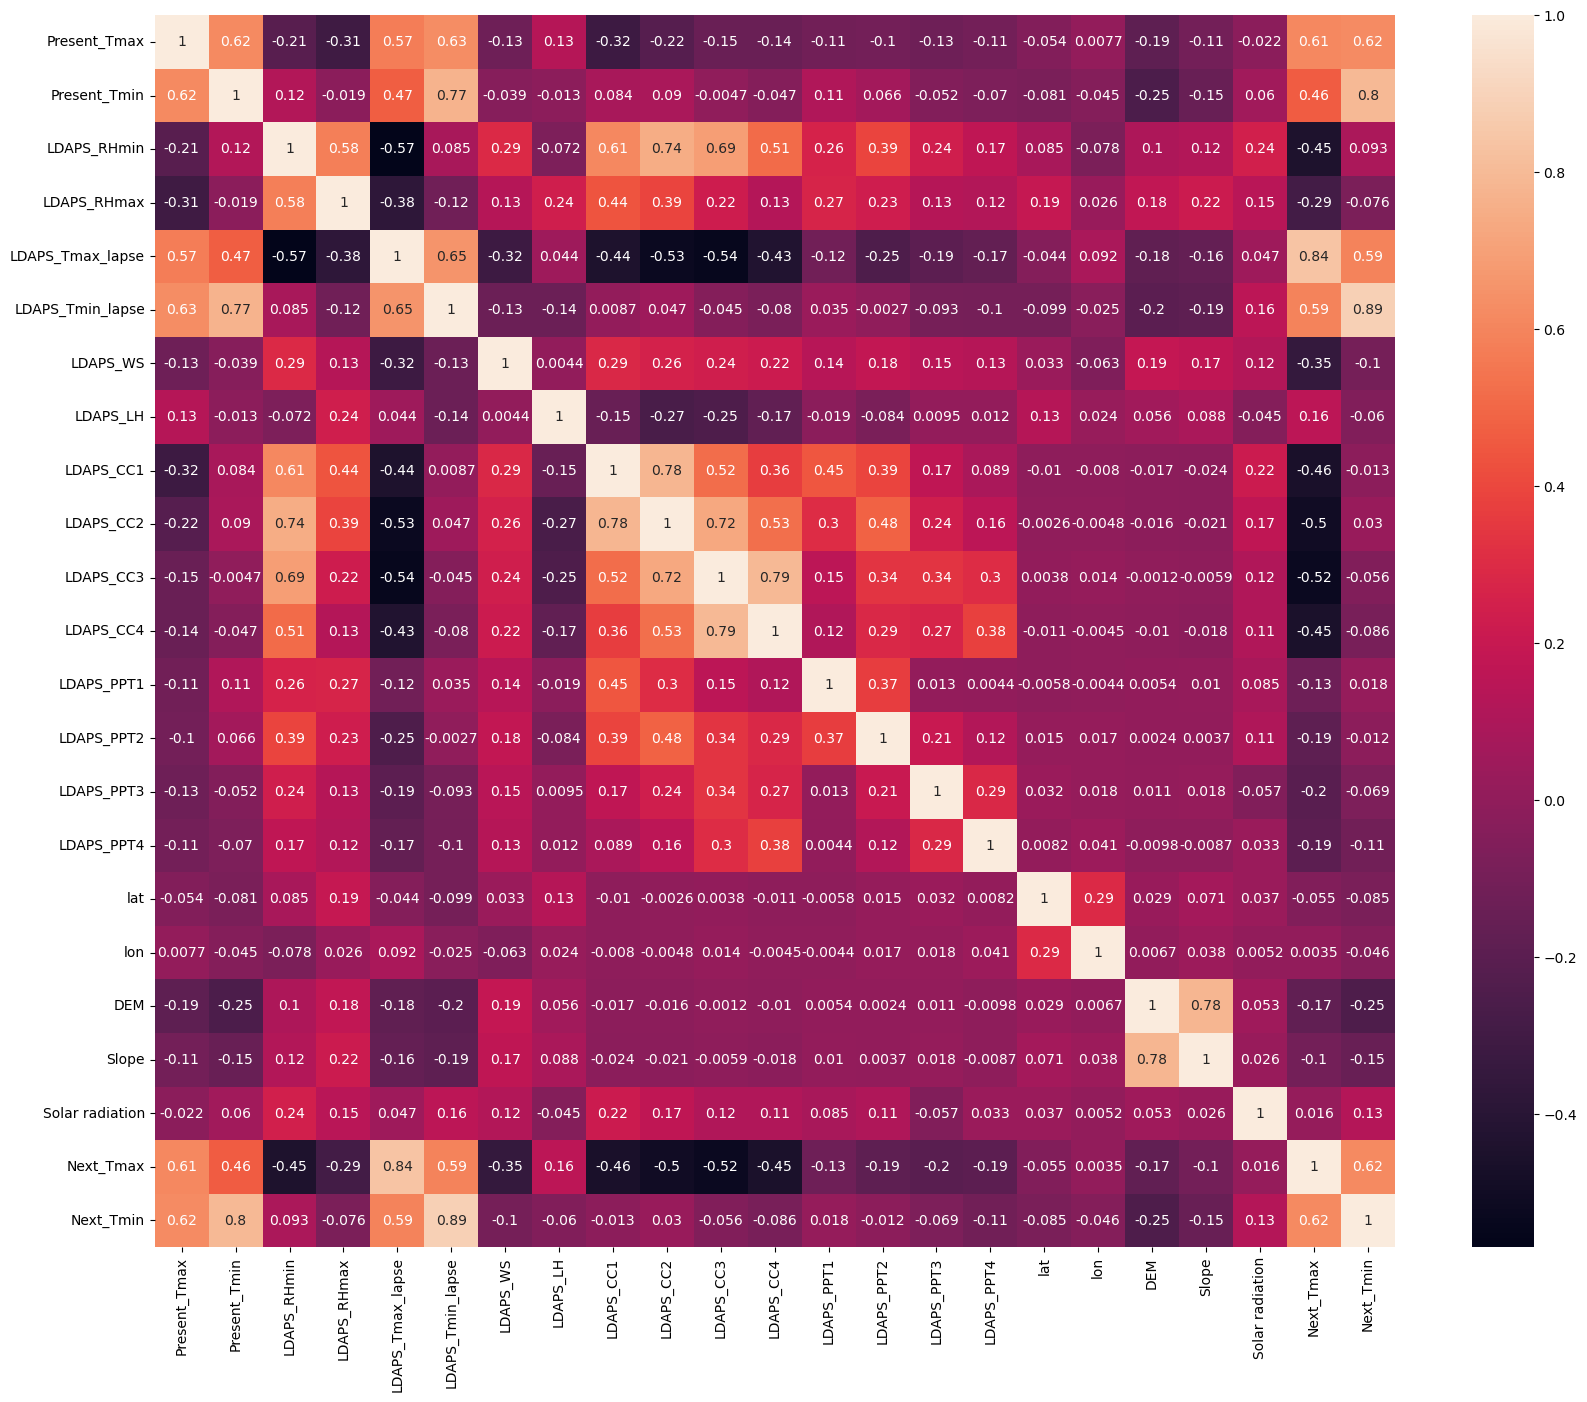

In [84]:
plt.figure(figsize=(20,16))
sns.heatmap(tfp.corr(), annot=True)
plt.show()

# Let's first work on Next_Tmax

In [85]:
x=tfp.iloc[:,0:-2].join(tfp.iloc[:,-1])

In [86]:
y=tfp.iloc[:,-2]

In [89]:
#Let's check the model at different random states and print the max r2 score value
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  71  is  0.817119756113601


In [90]:
#Let's apply the cross validation to the model
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.702826724710023

In [91]:
#max r2 score we get at randmom state 71
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 71,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [92]:
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.817119756113601
RMSE is :  1.3268791914547733


In [93]:
#Let's create a function
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [94]:
#lets make a function which evaluates the model using cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [95]:
#lets make use of KNN regressor
#we will use pipeline to bring bring features to common scale
knr=KNeighborsRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("knr",KNeighborsRegressor())])
parameters = {"knr__n_neighbors":range(2,30)}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'knr__n_neighbors': 28}

In [96]:
pipeline_knr=Pipeline([("ss",StandardScaler()),("knr",KNeighborsRegressor(n_neighbors=28))])
#knr=KNeighborsRegressor(n_neighbors=28)
maxr2_score(pipeline_knr,x,y)

r2 score corresponding to  42  is  0.8059970751018332
r2 score corresponding to  43  is  0.8359417432226413
r2 score corresponding to  44  is  0.8184702239087707
r2 score corresponding to  45  is  0.8192363020511177
r2 score corresponding to  46  is  0.8210373584569441
r2 score corresponding to  47  is  0.8161965701378938
r2 score corresponding to  48  is  0.825537203258923
r2 score corresponding to  49  is  0.8134543830468755
r2 score corresponding to  50  is  0.8214463443647341
r2 score corresponding to  51  is  0.8228252032781151
r2 score corresponding to  52  is  0.8203554031978566
r2 score corresponding to  53  is  0.8275427514753626
r2 score corresponding to  54  is  0.8298065385587903
r2 score corresponding to  55  is  0.833552647814962
r2 score corresponding to  56  is  0.8393246254428848
r2 score corresponding to  57  is  0.8219926159444011
r2 score corresponding to  58  is  0.8420611713426365
r2 score corresponding to  59  is  0.8350602549145227
r2 score corresponding to  60 

58

In [97]:
#Lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor())])
parameters = {"rfr__n_estimators":[10,100,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'rfr__n_estimators': 500}

In [98]:
pipeline_rfr=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor(n_estimators=500))])
maxr2_score(pipeline_rfr,x,y)

r2 score corresponding to  42  is  0.9025307119273266
r2 score corresponding to  43  is  0.9084636937474045
r2 score corresponding to  44  is  0.9062468458673408
r2 score corresponding to  45  is  0.909221166082965
r2 score corresponding to  46  is  0.9031933933543517
r2 score corresponding to  47  is  0.9043959591871823
r2 score corresponding to  48  is  0.9115681972523927
r2 score corresponding to  49  is  0.9030812557392426
r2 score corresponding to  50  is  0.9126704849720259
r2 score corresponding to  51  is  0.9067074411189597
r2 score corresponding to  52  is  0.9039418438055082
r2 score corresponding to  53  is  0.9093871277230267
r2 score corresponding to  54  is  0.9085979202689417
r2 score corresponding to  55  is  0.913582695948147
r2 score corresponding to  56  is  0.9110103740006487
r2 score corresponding to  57  is  0.9073215466840723
r2 score corresponding to  58  is  0.9112159475954742
r2 score corresponding to  59  is  0.9083256104104427
r2 score corresponding to  60 

85

In [99]:
#lets chcek the cross_val_score for random forest
print("RANDOM FOREST\n\n")
model_evaluation(pipeline_rfr,x,y)

RANDOM FOREST


Mean r2 score for regressor:  0.7121755654938751
standard deviation in r2 score for regressor:  0.05621783531816738
[0.7190776  0.66810456 0.65944564 0.81624769 0.69800233]


In [100]:
#lets make the final model and save it
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 85,test_size=0.20)
pipeline_rfr.fit(x_train,y_train)
y_pred = pipeline_rfr.predict(x_test)

In [101]:
#Lets find the rmse and r2_score using random forest model
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r2_score is: ",r2_score(y_test,y_pred))

MSE is:  0.7807678577602117
r2_score is:  0.9197300170087429


# Saving the model

In [102]:
import joblib 

# Save the model as a pickle in a file 
joblib.dump(pipeline_rfr, 'Temp_Next_Max.pkl')

['Temp_Next_Max.pkl']

# Now, let's work on Next_Tmin target value

In [103]:
#Let's add the independent attributes to a variable so that we can check for any outliers present in the dataset

X=tfp.iloc[:,0:-1]

In [104]:
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7745          23.1          17.8    24.688997    78.261383         27.812697   
7746          22.5          17.4    30.094858    83.690018         26.704905   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   

      LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1            24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2            24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3            23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4            23.486480  5.735004  107.965535   0.151407   0.249995  ...   
...                ...       ...         ...        ...        ...  ...   
7745         18.303014  6.603253    9.614074   0.052902   0.030169  ...   
7746         17.814038  5.768083   82.146707   0.066461   0.024518  ...   
7747         18.775678  6.148918   72.058294   0.030034   0.081035  ...   
7748         18.733519  6.542819   47.241457   0.035874   0.074962  ...   
7749         18.522965  7.289264    9.090034   0.048954   0.059869  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
0            0.0         0.0         0.0         0.0  37.6046  126.991   
1            0.0         0.0         0.0         0.0  37.6046  127.032   
2            0.0         0.0         0.0         0.0  37.5776  127.058   
3            0.0         0.0         0.0         0.0  37.6450  127.022   
4            0.0         0.0         0.0         0.0  37.5507  127.135   
...          ...         ...         ...         ...      ...      ...   
7745         0.0         0.0         0.0         0.0  37.5507  127.040   
7746         0.0         0.0         0.0         0.0  37.5102  127.086   
7747         0.0         0.0         0.0         0.0  37.5372  126.891   
7748         0.0         0.0         0.0         0.0  37.5237  126.909   
7749         0.0         0.0         0.0         0.0  37.5237  126.970   

           DEM   Slope  Solar radiation  Next_Tmax  
0     212.3350  2.7850      5992.895996       29.1  
1      44.7624  0.5141      5869.312500       30.5  
2      33.3068  0.2661      5863.555664       31.1  
3      45.7160  2.5348      5856.964844       31.7  
4      35.0380  0.5055      5859.552246       31.2  
...        ...     ...              ...        ...  
7745   26.2980  0.5721      4456.024414       27.6  
7746   21.9668  0.1332      4441.803711       28.0  
7747   15.5876  0.1554      4443.313965       28.3  
7748   17.2956  0.2223      4438.373535       28.6  
7749   19.5844  0.2713      4451.345215       27.8  

[7588 rows x 22 columns]

In [105]:
Y=tfp.iloc[:,-1]

    Now, the data is ready to apply the model


In [106]:
#Let's create a funtion for the model to check the results at different random states and preint the r2 score value

def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(X_train,Y_train)
        Y_pred = regr.predict(X_test)
        r2_scr=r2_score(Y_test,Y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [107]:
#lets make a function which evaluates the model using cross_val_score

def model_evaluation(model,X,Y):
    c_scores=cross_val_score(model,X,Y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

Let's apply KNeighbours Regressor model

In [108]:
knr=KNeighborsRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("knr",KNeighborsRegressor())])
parameters = {"knr__n_neighbors":range(2,30)}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(X, Y)
clf.best_params_

{'knr__n_neighbors': 24}

In [109]:
pipeline_knr=Pipeline([("ss",StandardScaler()),("knr",KNeighborsRegressor(n_neighbors=24))])
#knr=KNeighborsRegressor(n_neighbors=24)
maxr2_score(pipeline_knr,X,Y)

r2 score corresponding to  42  is  0.8481845224312479
r2 score corresponding to  43  is  0.8596652550391553
r2 score corresponding to  44  is  0.8463217607174816
r2 score corresponding to  45  is  0.8485595293806194
r2 score corresponding to  46  is  0.8499620343540097
r2 score corresponding to  47  is  0.8460792697211706
r2 score corresponding to  48  is  0.8600382590210534
r2 score corresponding to  49  is  0.8470804256170583
r2 score corresponding to  50  is  0.8503384626800365
r2 score corresponding to  51  is  0.8540270551356683
r2 score corresponding to  52  is  0.857282980809695
r2 score corresponding to  53  is  0.8455664269605508
r2 score corresponding to  54  is  0.8542842140052302
r2 score corresponding to  55  is  0.8536976680013104
r2 score corresponding to  56  is  0.8591958792136912
r2 score corresponding to  57  is  0.8466628371551391
r2 score corresponding to  58  is  0.8533438786518285
r2 score corresponding to  59  is  0.8546454515932531
r2 score corresponding to  60

60

Lets use random forest regressor

In [110]:
#Lets use random forest regressor
rfr=RandomForestRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor())])
parameters = {"rfr__n_estimators":[10,100,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(X,Y)
clf.best_params_

{'rfr__n_estimators': 100}

In [111]:
pipeline_rfr=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor(n_estimators=500))])
maxr2_score(pipeline_rfr,X,Y)

r2 score corresponding to  42  is  0.9057326929276628
r2 score corresponding to  43  is  0.9161681286068368
r2 score corresponding to  44  is  0.9063370188955581
r2 score corresponding to  45  is  0.9133547788719687
r2 score corresponding to  46  is  0.9087600532935657
r2 score corresponding to  47  is  0.9017464038388479
r2 score corresponding to  48  is  0.917166835944428
r2 score corresponding to  49  is  0.9112239358274052
r2 score corresponding to  50  is  0.9153736900540715
r2 score corresponding to  51  is  0.917777228013519
r2 score corresponding to  52  is  0.9106378018679279
r2 score corresponding to  53  is  0.9131237482915174
r2 score corresponding to  54  is  0.9123229862403366
r2 score corresponding to  55  is  0.9095484818620472
r2 score corresponding to  56  is  0.9168625677723068
r2 score corresponding to  57  is  0.904017564024471
r2 score corresponding to  58  is  0.912526276172361
r2 score corresponding to  59  is  0.9057401024517862
r2 score corresponding to  60  i

68

In [112]:
#lets chcek the cross_val_score for random forest
print("RANDOM FOREST\n\n")
model_evaluation(pipeline_rfr,X,Y)

RANDOM FOREST


Mean r2 score for regressor:  0.795068948930551
standard deviation in r2 score for regressor:  0.08761714368494807
[0.70589899 0.67876565 0.82010697 0.8846788  0.88589434]


In [113]:
#lets make the final model and save it
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 68,test_size=0.20)
pipeline_rfr.fit(X_train,Y_train)
Y_pred = pipeline_rfr.predict(X_test)

In [114]:
#Lets find the rmse and r2_score using random forest model
print("MSE is: ",mean_squared_error(Y_test,Y_pred))
print("r2_score is: ",r2_score(Y_test,Y_pred))

MSE is:  0.494492624664033
r2_score is:  0.9236781686236617


# Saving the Model

In [115]:
import joblib 

# Save the model as a pickle in a file 
joblib.dump(pipeline_rfr, 'Temp_Next_Min.pkl')

['Temp_Next_Min.pkl']

#                                 ****

# Loan Application Status Prediction

In [116]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Let's load the dataset.

In [117]:
lasp = pd.read_csv("C:/Users/vaddi/Downloads/loan_prediction.csv")

In [118]:
lasp

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

The dataset contains 614 rows and 13 columns. 

Now, lets check for the null values in the dataset

In [119]:
lasp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It is observed that 7 columns out of 13 contains null values.


In [120]:
#Let's check the data types of each column
lasp.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

It is observed that the dataset is mixture of float and object datatypes


In [121]:
#Lets check the corrrelation matrix
lasp.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

In [122]:
#Lets describe the dataset
lasp.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

There is difference between mean value and median so there can outliers present in the data set

# Data Visualization

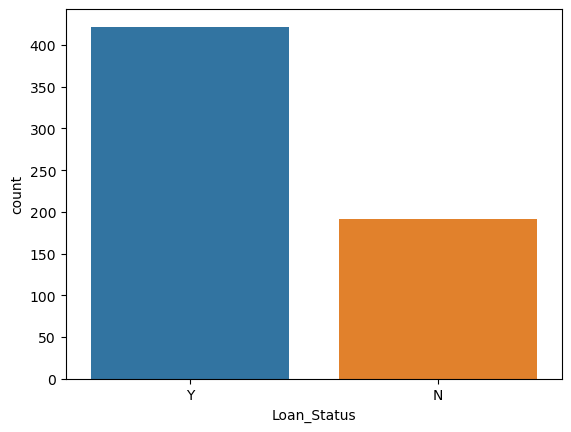

In [123]:
#Let's visualize the data in Loan_Status column
sns.countplot(x="Loan_Status",data=lasp)
plt.show()

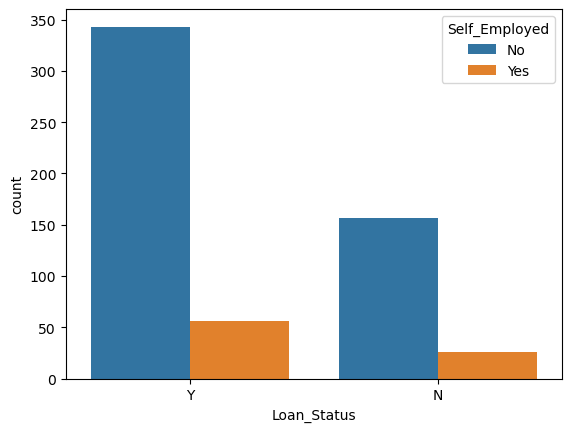

In [124]:
#lets check the count of loan status considering "Self_Employed"
sns.countplot(x="Loan_Status",hue="Self_Employed",data=lasp)
plt.show()

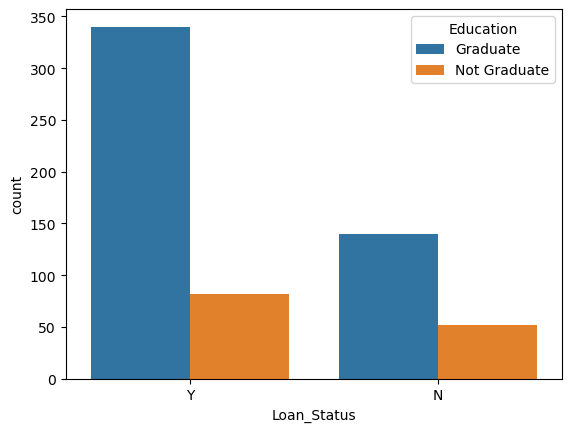

In [125]:
#Lets check the count based on "Education"
sns.countplot(x="Loan_Status",hue="Education",data=lasp)
plt.show()


People who are graduated has tendency of getting loans than who are not

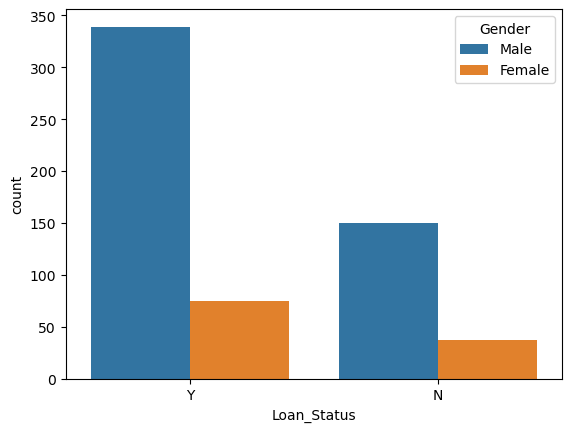

In [126]:
#lets chcek loan status based on gender
sns.countplot(x="Loan_Status",hue="Gender",data=lasp)
plt.show()

There are more number of males applying for the loans comapred to female

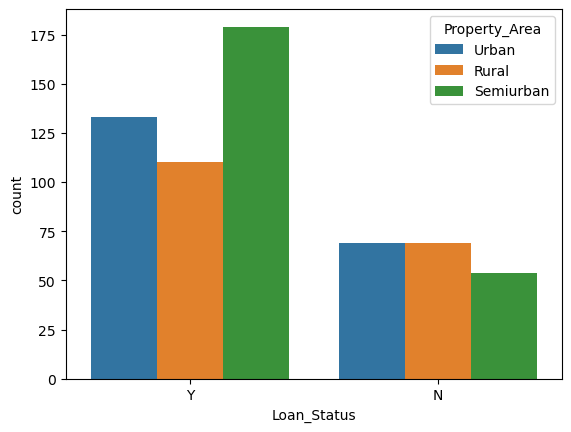

In [127]:
#lets chcek the loan status based on property area
sns.countplot(x="Loan_Status",hue="Property_Area",data=lasp)
plt.show()

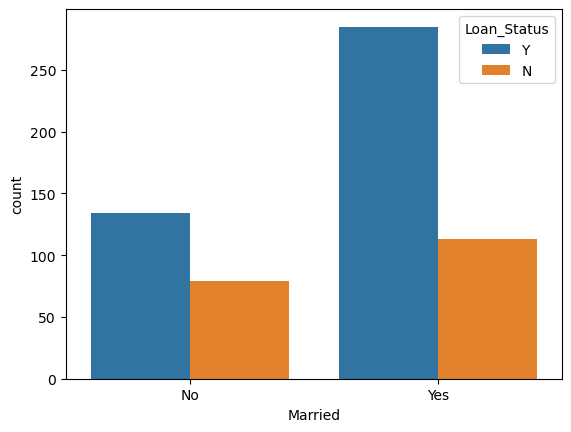

In [128]:
#Lets chcek the count based on marital status
sns.countplot(x="Married",hue="Loan_Status",data=lasp)
plt.show()


The ration of people geting loans to not getting loans when they are married is high

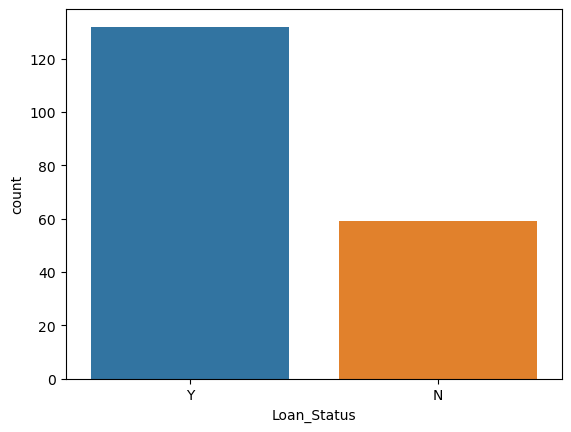

In [129]:
#Lets chcek loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data=lasp.loc[lasp["ApplicantIncome"]>5000])
plt.show()


People whose loan was sanctioned are more than double of people whose loan was not sanctioned

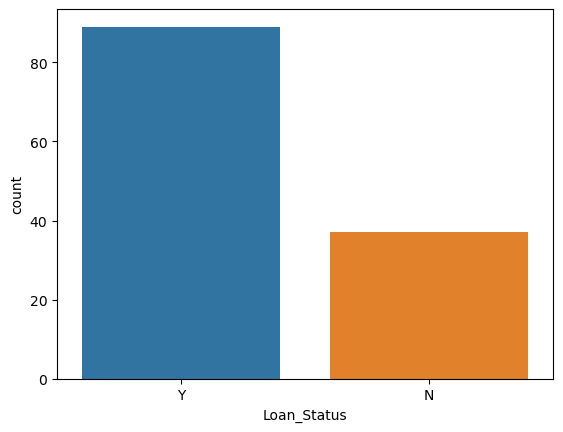

In [130]:
#Lets chcek what is the effect on above count if co-aplicant income is 0
sns.countplot(x="Loan_Status",data=lasp.loc[(lasp["ApplicantIncome"]>5000)&(lasp["CoapplicantIncome"]==0)])
plt.show()

The count reduced but still ratio is almost same

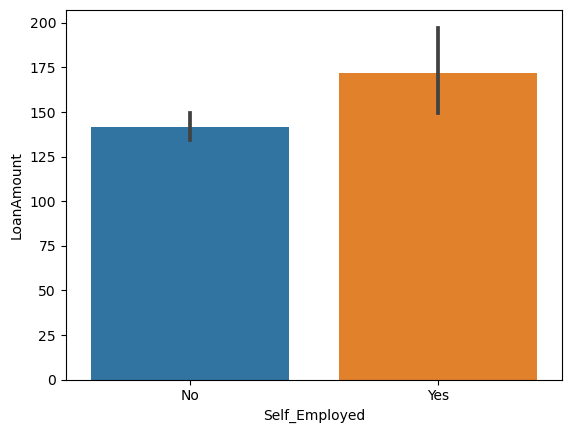

In [131]:
#lets compare the average loan amount between self employed and not self employed
sns.barplot(y="LoanAmount",x="Self_Employed",data=lasp)
plt.show()


Average loan amount demanded by the self employed is more but there is not too much difference

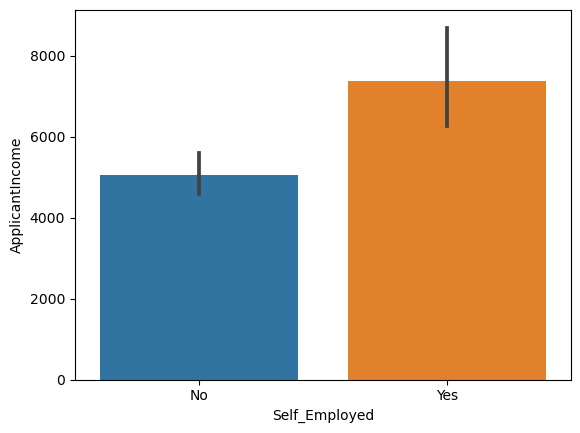

In [132]:
#Lets compare the average income of employed and self employed
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=lasp)
plt.show()


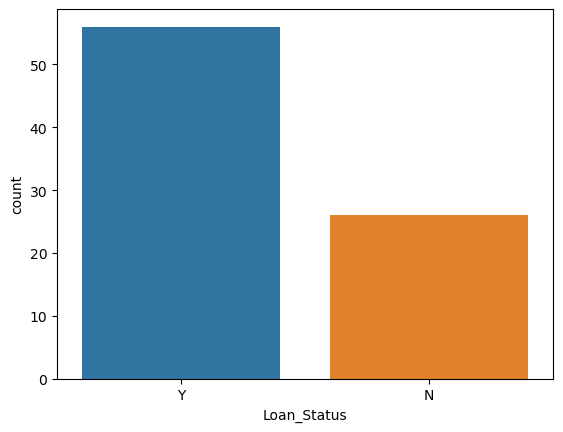

In [133]:
#Lets compare the count of people who got loans and who didn't
sns.countplot(x="Loan_Status",data=lasp.loc[lasp["Self_Employed"]=="Yes"])
plt.show()


There are more than double who got loan


Next step is to compare the average income of people who got loan and who didn't ,given they are self employed

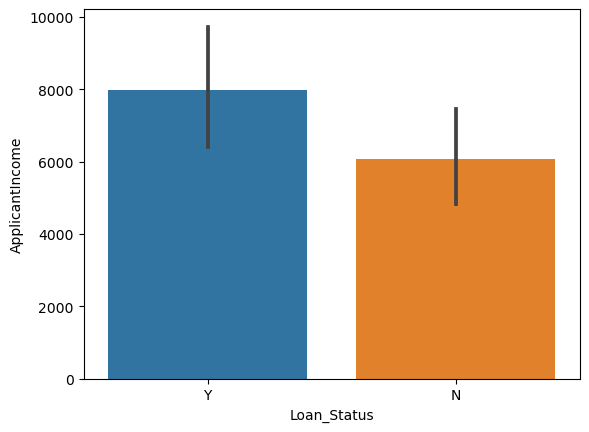

In [134]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=lasp.loc[lasp["Self_Employed"]=="Yes"])
plt.show()


So people who got loan has averge income more and it is expected

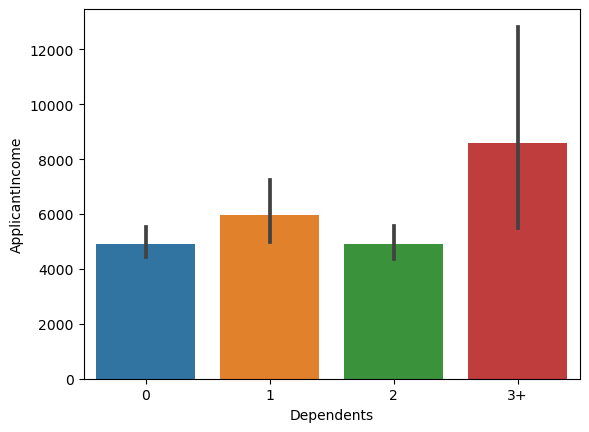

In [135]:
# let's chcek the average loan amount as per Dependents
sns.barplot(y="ApplicantIncome",x="Dependents",data=lasp)
plt.show()


Average income of dependents of with 2 is less than with 1

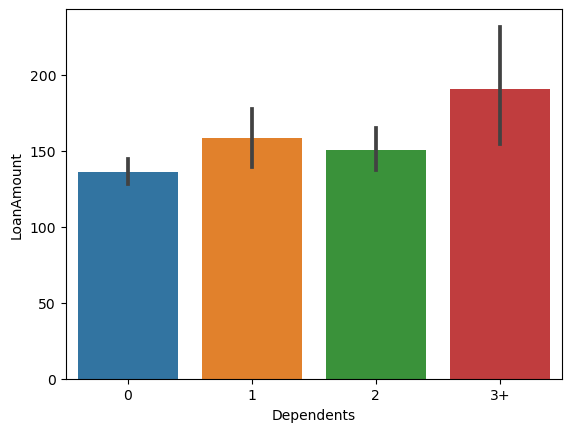

In [136]:
#lets chcek the average loan amount requested
sns.barplot(y="LoanAmount",x="Dependents",data=lasp)
plt.show()


Averge loan amount by person with dependents more 3 is highest

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

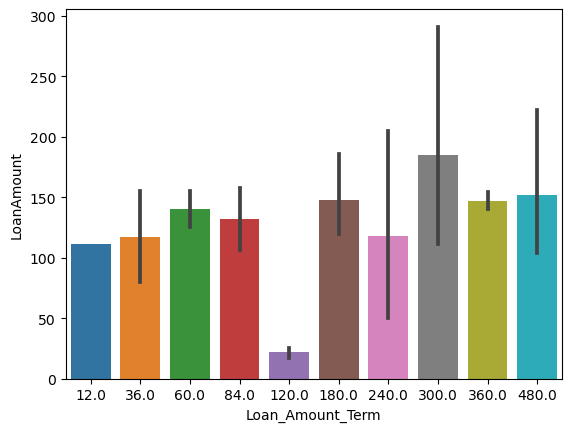

In [137]:
#Average loan amount requested groupped by Loan_Amount_Term
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=lasp)

In [138]:
for col in lasp.columns:
    print("Column data type :",lasp[col].dtype," column name :",col," Null values: ",lasp[col].isnull().sum())

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [139]:
#lets impute the object datatype columns by mode groupped by same target class
for col in lasp.columns:
    if lasp[col].dtype=="object" and lasp[col].isnull().sum()>0:
        lasp.loc[lasp["Loan_Status"]=="Y",[col]]=lasp.loc[lasp["Loan_Status"]=="Y",[col]].fillna(lasp.loc[lasp["Loan_Status"]=="Y",[col]].mode().iloc[0])
        lasp.loc[lasp["Loan_Status"]=="N",[col]]=lasp.loc[lasp["Loan_Status"]=="N",[col]].fillna(lasp.loc[lasp["Loan_Status"]=="N",[col]].mode().iloc[0])

In [140]:
#Lets again chcek the null values
lasp.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
#Loan amount can be imputed by mean grouped by classes
lasp.loc[lasp["Loan_Status"]=="Y",["LoanAmount"]]=lasp.loc[lasp["Loan_Status"]=="Y",["LoanAmount"]].fillna(lasp.loc[lasp["Loan_Status"]=="Y",["LoanAmount"]].mean())
lasp.loc[lasp["Loan_Status"]=="N",["LoanAmount"]]=lasp.loc[lasp["Loan_Status"]=="N",["LoanAmount"]].fillna(lasp.loc[lasp["Loan_Status"]=="N",["LoanAmount"]].mean())

In [142]:
#Lets impute rest of the columns with mode as they seem to be of categorical type
for col in lasp.columns:
    if lasp[col].isnull().sum()>0:
        lasp.loc[lasp["Loan_Status"]=="Y",[col]]=lasp.loc[lasp["Loan_Status"]=="Y",[col]].fillna(lasp.loc[lasp["Loan_Status"]=="Y",[col]].mode().iloc[0])
        lasp.loc[lasp["Loan_Status"]=="N",[col]]=lasp.loc[lasp["Loan_Status"]=="N",[col]].fillna(lasp.loc[lasp["Loan_Status"]=="N",[col]].mode().iloc[0])

In [143]:
#lets again check null values
lasp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
lasp.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [145]:
#dividing it into input and output
x=lasp.drop(columns=["Loan_Status"])
y=lasp[["Loan_Status"]]

In [146]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])

In [147]:
#lets chcek the skewness
x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [148]:
#Lets chcek the datatypes in input dataset
x.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [149]:
#we can delete loan id as it has no significance in prediction
x.drop(columns=["Loan_ID"],inplace=True)

In [150]:
x=pd.get_dummies(x,drop_first=True)

In [151]:
#Lets chcek the shape
x.shape

(614, 14)

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=8)

In [153]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [154]:
#lets bring all features to a common scale using
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

    Now, the data is ready to apply the model


In [155]:
lg=LogisticRegression()

In [156]:
lg.fit(x_train,y_train)

LogisticRegression()

In [157]:
lgpred=lg.predict(x_test)

In [158]:
lgpred

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [159]:
print(accuracy_score(y_test,lgpred))

0.8861788617886179


In [160]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(lg, x,y, cv=21)
print(score)
print(score.mean())
print(score.std())

[0.86666667 0.76666667 0.86666667 0.76666667 0.7        0.75862069
 0.79310345 0.79310345 0.75862069 0.79310345 0.79310345 0.79310345
 0.79310345 0.89655172 0.86206897 0.82758621 0.82758621 0.75862069
 0.86206897 0.82758621 0.82758621]
0.8062944718117132
0.04668666751379788


In [161]:
print(confusion_matrix(y_test,lgpred))

[[19 14]
 [ 0 90]]


<AxesSubplot:>

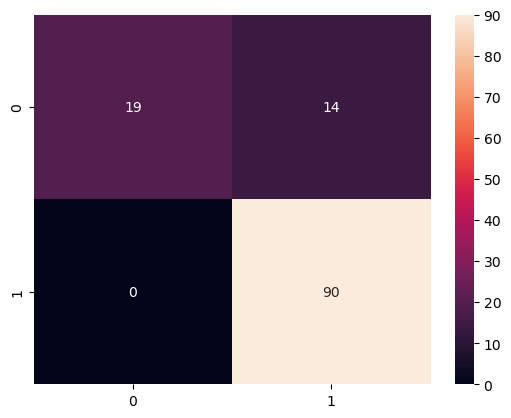

In [162]:
sns.heatmap(confusion_matrix(y_test,lgpred), annot=True)

# saving the model

In [163]:
import joblib 

# Save the model as a pickle in a file 
joblib.dump(lg, 'Loan.pkl')

['Loan.pkl']